In [7]:
import pandas as pd

In [8]:
df_abm = pd.read_csv('csv_files/abm.csv')
df_card = pd.read_csv('csv_files/card.csv')
df_cheque = pd.read_csv('csv_files/cheque.csv')
df_eft = pd.read_csv('csv_files/eft.csv')
df_emt = pd.read_csv('csv_files/emt.csv')
kyc_df = pd.read_csv('csv_files/kyc.csv')
kyc_industry_codes = pd.read_csv('csv_files/kyc_industry_codes.csv')
df_wire = pd.read_csv('csv_files/wire.csv')

In [9]:
# Assuming 'df_wire' has columns like 'Company Name', 'Transaction Type' (C/D), and 'Amount'
wire_summary = df_wire.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()

#Pivot the table
wire_summary_pivot = wire_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()

# Rename columns for clarity
wire_summary_pivot = wire_summary_pivot.rename(columns={'credit': 'Wire Credit Amount', 'debit': 'Wire Debit Amount'})

wire_summary_pivot


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount
0             SYNCID0000000000                0.03            6316.04
1             SYNCID0000000038            67268.48                NaN
2             SYNCID0000000055             6354.06                NaN
3             SYNCID0000000061             7217.61                NaN
4             SYNCID0000000063                 NaN          262017.10
..                         ...                 ...                ...
851           SYNCID0000017130            47425.96          249230.84
852           SYNCID0000017136            48536.47           17955.03
853           SYNCID0000017137                 NaN         2163342.52
854           SYNCID0000017147                 NaN            7321.02
855           SYNCID0000017154            71373.66           21093.95

[856 rows x 3 columns]

In [10]:
# Filter out rows where 'Credit Amount' or 'Debit Amount' is NaN
filtered_df = wire_summary_pivot.dropna(subset=['Wire Credit Amount', 'Wire Debit Amount'])

filtered_df


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount
0             SYNCID0000000000                0.03            6316.04
6             SYNCID0000000097             6970.17           21748.46
16            SYNCID0000000306             4104.31            2263.39
19            SYNCID0000000402            20238.10           43152.72
24            SYNCID0000000537            31913.31          292586.75
..                         ...                 ...                ...
847           SYNCID0000016991            81446.82           35280.18
850           SYNCID0000017096            37010.10           54117.69
851           SYNCID0000017130            47425.96          249230.84
852           SYNCID0000017136            48536.47           17955.03
855           SYNCID0000017154            71373.66           21093.95

[244 rows x 3 columns]

In [11]:
# Calculate the ratio of 'Credit Amount' to 'Debit Amount'
filtered_df['Wire Credit to Debit Ratio'] = filtered_df['Wire Credit Amount'] / filtered_df['Wire Debit Amount']

filtered_df


C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\782066201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Wire Credit to Debit Ratio'] = filtered_df['Wire Credit Amount'] / filtered_df['Wire Debit Amount']


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
0             SYNCID0000000000                0.03            6316.04   
6             SYNCID0000000097             6970.17           21748.46   
16            SYNCID0000000306             4104.31            2263.39   
19            SYNCID0000000402            20238.10           43152.72   
24            SYNCID0000000537            31913.31          292586.75   
..                         ...                 ...                ...   
847           SYNCID0000016991            81446.82           35280.18   
850           SYNCID0000017096            37010.10           54117.69   
851           SYNCID0000017130            47425.96          249230.84   
852           SYNCID0000017136            48536.47           17955.03   
855           SYNCID0000017154            71373.66           21093.95   

debit_credit  Wire Credit to Debit Ratio  
0                               0.000005  
6                               0.320490  
16                              1.813346  
19                              0.468988  
24                              0.109073  
..                                   ...  
847                             2.308572  
850                             0.683882  
851                             0.190289  
852                             2.703224  
855                             3.383608  

[244 rows x 4 columns]

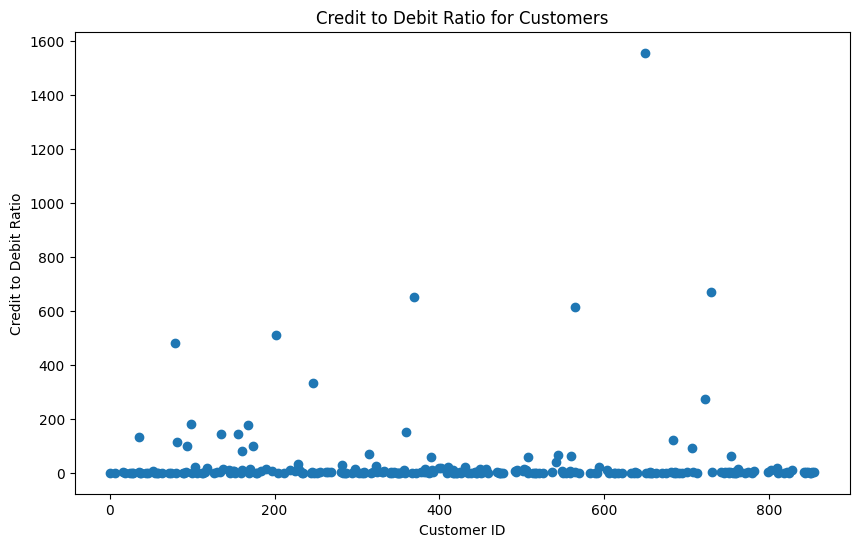

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df.index, filtered_df['Wire Credit to Debit Ratio'])
plt.xlabel("Customer ID")
plt.ylabel("Credit to Debit Ratio")
plt.title("Credit to Debit Ratio for Customers")
plt.show()


In [13]:
# Filter companies with credit and debit ratio higher than 100%
high_ratio_companies = filtered_df[filtered_df['Wire Credit to Debit Ratio'] > 100]

# Display the filtered data
high_ratio_companies


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
35            SYNCID0000000760           823043.42            6186.38   
79            SYNCID0000001487          2089044.88            4358.48   
81            SYNCID0000001507           142603.69            1258.48   
98            SYNCID0000001875           897458.87            4957.84   
135           SYNCID0000002622           346570.52            2419.39   
156           SYNCID0000002919          1258882.42            8860.25   
168           SYNCID0000003077           229032.61            1297.45   
174           SYNCID0000003138          2034108.90           20242.39   
202           SYNCID0000003598           600291.47            1179.27   
247           SYNCID0000004512          1871620.12            5638.24   
360           SYNCID0000006743           392396.65            2608.48   
369           SYNCID0000006926          2864105.24            4412.31   
564           SYNCID0000010990           379898.19             620.18   
650           SYNCID0000012919          1589343.90            1022.16   
683           SYNCID0000013574            57545.41             472.73   
722           SYNCID0000014581            52462.06             193.28   
730           SYNCID0000014841          1014663.75            1515.42   

debit_credit  Wire Credit to Debit Ratio  
35                            133.041200  
79                            479.305831  
81                            113.314228  
98                            181.018119  
135                           143.247066  
156                           142.082043  
168                           176.525192  
174                           100.487586  
202                           509.036497  
247                           331.951127  
360                           150.431151  
369                           649.116957  
564                           612.561176  
650                          1554.887591  
683                           121.729973  
722                           271.430360  
730                           669.559429

In [14]:
# Filter companies with credit and debit ratio higher than 100%
low_ratio_companies = filtered_df[filtered_df['Wire Credit to Debit Ratio'] < 0.1]

# Display the filtered data
low_ratio_companies


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
0             SYNCID0000000000                0.03            6316.04   
27            SYNCID0000000568            17995.60          216059.52   
37            SYNCID0000000793             4847.98           76643.54   
38            SYNCID0000000795             6756.02           69505.61   
112           SYNCID0000002211              720.32            9011.37   
113           SYNCID0000002220             2436.97           59952.23   
152           SYNCID0000002892              385.87           18071.23   
177           SYNCID0000003200             9182.16          208360.53   
204           SYNCID0000003621             8637.01          170976.31   
212           SYNCID0000003793             2060.80          117172.24   
294           SYNCID0000005444            22098.64          446289.58   
309           SYNCID0000005779          2120455.39        24734897.47   
317           SYNCID0000005945            58542.40          701573.36   
349           SYNCID0000006481             3435.47          126202.25   
352           SYNCID0000006554            20342.22          391142.49   
367           SYNCID0000006897            17236.99          222939.17   
372           SYNCID0000007001           894980.51        14115472.12   
409           SYNCID0000007963             5682.18          117143.44   
418           SYNCID0000008128             6104.76          100888.89   
435           SYNCID0000008359            48950.15          772935.07   
459           SYNCID0000008923             3677.05           72943.63   
477           SYNCID0000009229           168573.92         2184968.68   
558           SYNCID0000010914            25918.35          495245.77   
569           SYNCID0000011067              850.76           14514.52   
606           SYNCID0000011813            18109.42          348100.15   
622           SYNCID0000012248              164.61           97772.81   
633           SYNCID0000012511             3784.75           83437.54   
655           SYNCID0000012993             3196.40           51359.85   
663           SYNCID0000013187              209.22            5206.58   
713           SYNCID0000014311            18668.30          327265.09   
751           SYNCID0000015238              771.38           12145.87   
760           SYNCID0000015471              316.70          200377.18   
844           SYNCID0000016860            28659.12          347350.60   

debit_credit  Wire Credit to Debit Ratio  
0                               0.000005  
27                              0.083290  
37                              0.063254  
38                              0.097201  
112                             0.079935  
113                             0.040649  
152                             0.021353  
177                             0.044069  
204                             0.050516  
212                             0.017588  
294                             0.049516  
309                             0.085727  
317                             0.083444  
349                             0.027222  
352                             0.052007  
367                             0.077317  
372                             0.063404  
409                             0.048506  
418                             0.060510  
435                             0.063330  
459                             0.050409  
477                             0.077152  
558                             0.052334  
569                             0.058614  
606                             0.052024  
622                             0.001684  
633                             0.045360  
655                             0.062235  
663                             0.040184  
713                             0.057043  
751                             0.063510  
760                             0.001581  
844                             0.082508

In [15]:
# Calculate the ratio of 'Debit Amount' to 'Credit Amount'
filtered_df['Wire Debit to Credit Ratio'] = filtered_df['Wire Debit Amount'] / filtered_df['Wire Credit Amount']

# Filter companies with debit to credit ratio higher than a threshold (e.g., 10)
high_debit_ratio_companies = filtered_df[filtered_df['Wire Debit to Credit Ratio'] > 10]

high_debit_ratio_companies

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\3901783776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Wire Debit to Credit Ratio'] = filtered_df['Wire Debit Amount'] / filtered_df['Wire Credit Amount']


debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
0             SYNCID0000000000                0.03            6316.04   
27            SYNCID0000000568            17995.60          216059.52   
37            SYNCID0000000793             4847.98           76643.54   
38            SYNCID0000000795             6756.02           69505.61   
112           SYNCID0000002211              720.32            9011.37   
113           SYNCID0000002220             2436.97           59952.23   
152           SYNCID0000002892              385.87           18071.23   
177           SYNCID0000003200             9182.16          208360.53   
204           SYNCID0000003621             8637.01          170976.31   
212           SYNCID0000003793             2060.80          117172.24   
294           SYNCID0000005444            22098.64          446289.58   
309           SYNCID0000005779          2120455.39        24734897.47   
317           SYNCID0000005945            58542.40          701573.36   
349           SYNCID0000006481             3435.47          126202.25   
352           SYNCID0000006554            20342.22          391142.49   
367           SYNCID0000006897            17236.99          222939.17   
372           SYNCID0000007001           894980.51        14115472.12   
409           SYNCID0000007963             5682.18          117143.44   
418           SYNCID0000008128             6104.76          100888.89   
435           SYNCID0000008359            48950.15          772935.07   
459           SYNCID0000008923             3677.05           72943.63   
477           SYNCID0000009229           168573.92         2184968.68   
558           SYNCID0000010914            25918.35          495245.77   
569           SYNCID0000011067              850.76           14514.52   
606           SYNCID0000011813            18109.42          348100.15   
622           SYNCID0000012248              164.61           97772.81   
633           SYNCID0000012511             3784.75           83437.54   
655           SYNCID0000012993             3196.40           51359.85   
663           SYNCID0000013187              209.22            5206.58   
713           SYNCID0000014311            18668.30          327265.09   
751           SYNCID0000015238              771.38           12145.87   
760           SYNCID0000015471              316.70          200377.18   
844           SYNCID0000016860            28659.12          347350.60   

debit_credit  Wire Credit to Debit Ratio  Wire Debit to Credit Ratio  
0                               0.000005               210534.666667  
27                              0.083290                   12.006242  
37                              0.063254                   15.809376  
38                              0.097201                   10.287952  
112                             0.079935                   12.510232  
113                             0.040649                   24.601136  
152                             0.021353                   46.832431  
177                             0.044069                   22.691886  
204                             0.050516                   19.795775  
212                             0.017588                   56.857648  
294                             0.049516                   20.195341  
309                             0.085727                   11.664899  
317                             0.083444                   11.984021  
349                             0.027222                   36.735076  
352                             0.052007                   19.228112  
367                             0.077317                   12.933765  
372                             0.063404                   15.771821  
409                             0.048506                   20.615933  
418                             0.060510                   16.526266  
435                             0.063330                   15.790249  
459                       

In [16]:
# Create a new column 'Large Transactions' indicating the number of transactions above 10000
df_wire['Large Transactions'] = (df_wire['amount_cad'] > 10000).astype(int)

# Group by 'Company Name' and sum the 'Large Transactions' column
large_transactions_by_company = df_wire.groupby('customer_id')['Large Transactions'].sum().reset_index()

# Merge the 'large_transactions_by_company' DataFrame with 'high_ratio_companies'
high_ratio_companies = pd.merge(high_ratio_companies, large_transactions_by_company, on='customer_id', how='left')

# Display the updated DataFrame
high_ratio_companies

customer_id  Wire Credit Amount  Wire Debit Amount  \
0   SYNCID0000000760           823043.42            6186.38   
1   SYNCID0000001487          2089044.88            4358.48   
2   SYNCID0000001507           142603.69            1258.48   
3   SYNCID0000001875           897458.87            4957.84   
4   SYNCID0000002622           346570.52            2419.39   
5   SYNCID0000002919          1258882.42            8860.25   
6   SYNCID0000003077           229032.61            1297.45   
7   SYNCID0000003138          2034108.90           20242.39   
8   SYNCID0000003598           600291.47            1179.27   
9   SYNCID0000004512          1871620.12            5638.24   
10  SYNCID0000006743           392396.65            2608.48   
11  SYNCID0000006926          2864105.24            4412.31   
12  SYNCID0000010990           379898.19             620.18   
13  SYNCID0000012919          1589343.90            1022.16   
14  SYNCID0000013574            57545.41             472.73   
15  SYNCID0000014581            52462.06             193.28   
16  SYNCID0000014841          1014663.75            1515.42   

    Wire Credit to Debit Ratio  Large Transactions  
0                   133.041200                   1  
1                   479.305831                  40  
2                   113.314228                   2  
3                   181.018119                   4  
4                   143.247066                   1  
5                   142.082043                   8  
6                   176.525192                   2  
7                   100.487586                   3  
8                   509.036497                   2  
9                   331.951127                   2  
10                  150.431151                   3  
11                  649.116957                   3  
12                  612.561176                   3  
13                 1554.887591                   1  
14                  121.729973                   2  
15                  271.430360                   2  
16                  669.559429                   4

In [17]:
#Similarly for low_ratio companies
low_ratio_companies = pd.merge(low_ratio_companies, large_transactions_by_company, on='customer_id', how='left')

low_ratio_companies

#Similarly for high_debit_ratio_companies
high_debit_ratio_companies = pd.merge(high_debit_ratio_companies, large_transactions_by_company, on='customer_id', how='left')

high_debit_ratio_companies


customer_id  Wire Credit Amount  Wire Debit Amount  \
0   SYNCID0000000000                0.03            6316.04   
1   SYNCID0000000568            17995.60          216059.52   
2   SYNCID0000000793             4847.98           76643.54   
3   SYNCID0000000795             6756.02           69505.61   
4   SYNCID0000002211              720.32            9011.37   
5   SYNCID0000002220             2436.97           59952.23   
6   SYNCID0000002892              385.87           18071.23   
7   SYNCID0000003200             9182.16          208360.53   
8   SYNCID0000003621             8637.01          170976.31   
9   SYNCID0000003793             2060.80          117172.24   
10  SYNCID0000005444            22098.64          446289.58   
11  SYNCID0000005779          2120455.39        24734897.47   
12  SYNCID0000005945            58542.40          701573.36   
13  SYNCID0000006481             3435.47          126202.25   
14  SYNCID0000006554            20342.22          391142.49   
15  SYNCID0000006897            17236.99          222939.17   
16  SYNCID0000007001           894980.51        14115472.12   
17  SYNCID0000007963             5682.18          117143.44   
18  SYNCID0000008128             6104.76          100888.89   
19  SYNCID0000008359            48950.15          772935.07   
20  SYNCID0000008923             3677.05           72943.63   
21  SYNCID0000009229           168573.92         2184968.68   
22  SYNCID0000010914            25918.35          495245.77   
23  SYNCID0000011067              850.76           14514.52   
24  SYNCID0000011813            18109.42          348100.15   
25  SYNCID0000012248              164.61           97772.81   
26  SYNCID0000012511             3784.75           83437.54   
27  SYNCID0000012993             3196.40           51359.85   
28  SYNCID0000013187              209.22            5206.58   
29  SYNCID0000014311            18668.30          327265.09   
30  SYNCID0000015238              771.38           12145.87   
31  SYNCID0000015471              316.70          200377.18   
32  SYNCID0000016860            28659.12          347350.60   

    Wire Credit to Debit Ratio  Wire Debit to Credit Ratio  Large Transactions  
0                     0.000005               210534.666667                   0  
1                     0.083290                   12.006242                   9  
2                     0.063254                   15.809376                   1  
3                     0.097201                   10.287952                   2  
4                     0.079935                   12.510232                   0  
5                     0.040649                   24.601136                   1  
6                     0.021353                   46.832431                   1  
7                     0.044069                   22.691886                   1  
8                     0.050516                   19.795775                   1  
9                     0.017588                   56.857648                   2  
10                    0.049516                   20.195341                   5  
11                    0.085727                   11.664899                  20  
12                    0.083444                   11.984021                  11  
13                    0.027222                   36.735076                   3  
14                    0.052007                   19.228112                   8  
15                    0.077317                   12.933765                   6  
16                    0.063404                   15.771821                  28  
17                    0.048506                   20.615933                   3  
18                    0.060510                   16.526266                   2  
19                    0.063330                   15.790249                  16  
20                    0.050409                   19.837541                   1  
21                    0.077152                   12.961487                   7  
22 

In [18]:
# Calculate transaction frequency for each company
transaction_frequency = df_wire.groupby('customer_id')['wire_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'wire_id': 'Transaction Frequency'})

# Merge transaction frequency with existing DataFrames
high_ratio_companies = pd.merge(high_ratio_companies, transaction_frequency, on='customer_id', how='left')
low_ratio_companies = pd.merge(low_ratio_companies, transaction_frequency, on='customer_id', how='left')
high_debit_ratio_companies = pd.merge(high_debit_ratio_companies, transaction_frequency, on='customer_id', how='left')

# Display the updated DataFrames with transaction frequency
print("High Ratio Companies:")
print(high_ratio_companies)

print("\nLow Ratio Companies:")
print(low_ratio_companies)

print("\nHigh Debit Ratio Companies:")
high_debit_ratio_companies


High Ratio Companies:
         customer_id  Wire Credit Amount  Wire Debit Amount  \
0   SYNCID0000000760           823043.42            6186.38   
1   SYNCID0000001487          2089044.88            4358.48   
2   SYNCID0000001507           142603.69            1258.48   
3   SYNCID0000001875           897458.87            4957.84   
4   SYNCID0000002622           346570.52            2419.39   
5   SYNCID0000002919          1258882.42            8860.25   
6   SYNCID0000003077           229032.61            1297.45   
7   SYNCID0000003138          2034108.90           20242.39   
8   SYNCID0000003598           600291.47            1179.27   
9   SYNCID0000004512          1871620.12            5638.24   
10  SYNCID0000006743           392396.65            2608.48   
11  SYNCID0000006926          2864105.24            4412.31   
12  SYNCID0000010990           379898.19             620.18   
13  SYNCID0000012919          1589343.90            1022.16   
14  SYNCID0000013574            5

customer_id  Wire Credit Amount  Wire Debit Amount  \
0   SYNCID0000000000                0.03            6316.04   
1   SYNCID0000000568            17995.60          216059.52   
2   SYNCID0000000793             4847.98           76643.54   
3   SYNCID0000000795             6756.02           69505.61   
4   SYNCID0000002211              720.32            9011.37   
5   SYNCID0000002220             2436.97           59952.23   
6   SYNCID0000002892              385.87           18071.23   
7   SYNCID0000003200             9182.16          208360.53   
8   SYNCID0000003621             8637.01          170976.31   
9   SYNCID0000003793             2060.80          117172.24   
10  SYNCID0000005444            22098.64          446289.58   
11  SYNCID0000005779          2120455.39        24734897.47   
12  SYNCID0000005945            58542.40          701573.36   
13  SYNCID0000006481             3435.47          126202.25   
14  SYNCID0000006554            20342.22          391142.49   
15  SYNCID0000006897            17236.99          222939.17   
16  SYNCID0000007001           894980.51        14115472.12   
17  SYNCID0000007963             5682.18          117143.44   
18  SYNCID0000008128             6104.76          100888.89   
19  SYNCID0000008359            48950.15          772935.07   
20  SYNCID0000008923             3677.05           72943.63   
21  SYNCID0000009229           168573.92         2184968.68   
22  SYNCID0000010914            25918.35          495245.77   
23  SYNCID0000011067              850.76           14514.52   
24  SYNCID0000011813            18109.42          348100.15   
25  SYNCID0000012248              164.61           97772.81   
26  SYNCID0000012511             3784.75           83437.54   
27  SYNCID0000012993             3196.40           51359.85   
28  SYNCID0000013187              209.22            5206.58   
29  SYNCID0000014311            18668.30          327265.09   
30  SYNCID0000015238              771.38           12145.87   
31  SYNCID0000015471              316.70          200377.18   
32  SYNCID0000016860            28659.12          347350.60   

    Wire Credit to Debit Ratio  Wire Debit to Credit Ratio  \
0                     0.000005               210534.666667   
1                     0.083290                   12.006242   
2                     0.063254                   15.809376   
3                     0.097201                   10.287952   
4                     0.079935                   12.510232   
5                     0.040649                   24.601136   
6                     0.021353                   46.832431   
7                     0.044069                   22.691886   
8                     0.050516                   19.795775   
9                     0.017588                   56.857648   
10                    0.049516                   20.195341   
11                    0.085727                   11.664899   
12                    0.083444                   11.984021   
13                    0.027222                   36.735076   
14                    0.052007                   19.228112   
15                    0.077317                   12.933765   
16                    0.063404                   15.771821   
17                    0.048506                   20.615933   
18                    0.060510                   16.526266   
19                    0.063330                   15.790249   
20                    0.050409                   19.837541   
21                    0.077152                   12.961487   
22                    0.052334                   19.107920   
23                    0.058614                   17.060652   
24                    0.052024                   19.222049   
25                    0.001684                  593.966405   
26                    0.045360                   22.045720   
27                    0.062235                   16.068030   
28                    0.040184                   24.885671   
29    

In [19]:
import pandas as pd

# Load the 'wire.csv' data into a DataFrame
df_wire = pd.read_csv('csv_files/wire.csv')

# 1. Calculate Credit and Debit Amounts
wire_summary = df_wire.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
wire_summary_pivot = wire_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
wire_summary_pivot = wire_summary_pivot.rename(columns={'credit': 'Wire Credit Amount', 'debit': 'Wire Debit Amount'})

# 2. Filter out NaN values
filtered_df = wire_summary_pivot.dropna(subset=['Wire Credit Amount', 'Wire Debit Amount'])

# 3. Calculate Ratios
filtered_df['Wire Credit to Debit Ratio'] = filtered_df['Wire Credit Amount'] / filtered_df['Wire Debit Amount']
filtered_df['Wire Debit to Credit Ratio'] = filtered_df['Wire Debit Amount'] / filtered_df['Wire Credit Amount']

# 4. Identify Large Transactions
df_wire['Large Transactions'] = (df_wire['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_wire.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_wire.groupby('customer_id')['wire_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'wire_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_wire = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_wire = pd.merge(final_df_wire, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['Wire Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['Wire Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 100  # Example: 10 for Debit to Credit

final_df_wire['Transaction Type'] = final_df_wire.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_wire = final_df_wire[final_df_wire['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_wire)

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1062596054.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Wire Credit to Debit Ratio'] = filtered_df['Wire Credit Amount'] / filtered_df['Wire Debit Amount']


          customer_id  Wire Credit Amount  Wire Debit Amount  \
0    SYNCID0000000000                0.03            6316.04   
7    SYNCID0000000760           823043.42            6186.38   
20   SYNCID0000001487          2089044.88            4358.48   
22   SYNCID0000001507           142603.69            1258.48   
27   SYNCID0000001875           897458.87            4957.84   
38   SYNCID0000002622           346570.52            2419.39   
45   SYNCID0000002919          1258882.42            8860.25   
49   SYNCID0000003077           229032.61            1297.45   
52   SYNCID0000003138          2034108.90           20242.39   
58   SYNCID0000003598           600291.47            1179.27   
70   SYNCID0000004512          1871620.12            5638.24   
107  SYNCID0000006743           392396.65            2608.48   
109  SYNCID0000006926          2864105.24            4412.31   
171  SYNCID0000010990           379898.19             620.18   
183  SYNCID0000012248              164.6

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1062596054.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Wire Debit to Credit Ratio'] = filtered_df['Wire Debit Amount'] / filtered_df['Wire Credit Amount']


In [20]:
import pandas as pd

# Load the 'abm.csv' data into a DataFrame
df_abm = pd.read_csv('csv_files/abm.csv')

# 1. Calculate Credit and Debit Amounts
abm_summary = df_abm.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
abm_summary_pivot = abm_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
abm_summary_pivot = abm_summary_pivot.rename(columns={'credit': 'ABM Credit Amount', 'debit': 'ABM Debit Amount'})

# 2. Filter out NaN values
filtered_df = abm_summary_pivot.dropna(subset=['ABM Credit Amount', 'ABM Debit Amount'])

# 3. Calculate Ratios
filtered_df['ABM Credit to Debit Ratio'] = filtered_df['ABM Credit Amount'] / filtered_df['ABM Debit Amount']
filtered_df['ABM Debit to Credit Ratio'] = filtered_df['ABM Debit Amount'] / filtered_df['ABM Credit Amount']

# 4. Identify Large Transactions
df_abm['Large Transactions'] = (df_abm['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_abm.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_abm.groupby('customer_id')['abm_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'abm_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_abm = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_abm = pd.merge(final_df_abm, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['ABM Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['ABM Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 100  # Example: 10 for Debit to Credit

final_df_abm['Transaction Type'] = final_df_abm.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_abm = final_df_abm[final_df_abm['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_abm)

           customer_id  ABM Credit Amount  ABM Debit Amount  \
52    SYNCID0000000517            3001.75             27.06   
54    SYNCID0000000533           37476.68            177.45   
68    SYNCID0000000681           30115.93            103.75   
82    SYNCID0000000841           31343.33            312.94   
85    SYNCID0000000855           34378.52            321.91   
128   SYNCID0000001202            3238.23              3.70   
140   SYNCID0000001326              56.46           5784.05   
174   SYNCID0000001721            8380.99             42.02   
206   SYNCID0000001994            2516.88             20.78   
303   SYNCID0000002918          117918.44            432.55   
306   SYNCID0000002933           41320.86            172.46   
308   SYNCID0000002965           52784.25            494.61   
332   SYNCID0000003184          122898.99            224.91   
350   SYNCID0000003333           29963.97            211.22   
376   SYNCID0000003677          106416.01            21

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\2839466000.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ABM Credit to Debit Ratio'] = filtered_df['ABM Credit Amount'] / filtered_df['ABM Debit Amount']
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\2839466000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ABM Debit to Credit Ratio'] = filtered_df['ABM Debit Amount'] / filtered_df['ABM Credit Amount']


In [21]:
import pandas as pd

# Load the 'cheque.csv' data into a DataFrame
df_cheque = pd.read_csv('csv_files/cheque.csv')

# 1. Calculate Credit and Debit Amounts
cheque_summary = df_cheque.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
cheque_summary_pivot = cheque_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
cheque_summary_pivot = cheque_summary_pivot.rename(columns={'credit': 'Cheque Credit Amount', 'debit': 'Cheque Debit Amount'})

# 2. Filter out NaN values
filtered_df = cheque_summary_pivot.dropna(subset=['Cheque Credit Amount', 'Cheque Debit Amount'])

# 3. Calculate Ratios
filtered_df['Cheque Credit to Debit Ratio'] = filtered_df['Cheque Credit Amount'] / filtered_df['Cheque Debit Amount']
filtered_df['Cheque Debit to Credit Ratio'] = filtered_df['Cheque Debit Amount'] / filtered_df['Cheque Credit Amount']

# 4. Identify Large Transactions
df_cheque['Large Transactions'] = (df_cheque['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_cheque.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_cheque.groupby('customer_id')['cheque_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'cheque_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_cheque = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_cheque = pd.merge(final_df_cheque, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['Cheque Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['Cheque Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 10  # Example: 10 for Debit to Credit

final_df_cheque['Transaction Type'] = final_df_cheque.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_cheque = final_df_cheque[final_df_cheque['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_cheque)

           customer_id  Cheque Credit Amount  Cheque Debit Amount  \
6     SYNCID0000000011              35371.37            359316.93   
10    SYNCID0000000021                134.63              5548.89   
19    SYNCID0000000053                664.73              7682.23   
32    SYNCID0000000082                225.55              2732.87   
39    SYNCID0000000094               6148.24             63790.86   
...                ...                   ...                  ...   
7370  SYNCID0000017132              29615.26            573317.40   
7371  SYNCID0000017133                968.29             54299.25   
7377  SYNCID0000017142               2797.64             47317.03   
7381  SYNCID0000017156                881.12             11409.24   
7388  SYNCID0000017173               5012.53            366553.15   

      Cheque Credit to Debit Ratio  Cheque Debit to Credit Ratio  \
6                         0.098441                     10.158411   
10                        0.024263 

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\236722309.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cheque Credit to Debit Ratio'] = filtered_df['Cheque Credit Amount'] / filtered_df['Cheque Debit Amount']
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\236722309.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cheque Debit to Credit Ratio'] = filtered_df['Cheque Debit Amount'] / filtered_df['Cheque Credit Amount']


In [22]:
import pandas as pd

# Load the 'eft.csv' data into a DataFrame
df_eft = pd.read_csv('csv_files/eft.csv')

# 1. Calculate Credit and Debit Amounts
eft_summary = df_eft.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
eft_summary_pivot = eft_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
eft_summary_pivot = eft_summary_pivot.rename(columns={'credit': 'EFT Credit Amount', 'debit': 'EFT Debit Amount'})

# 2. Filter out NaN values
filtered_df = eft_summary_pivot.dropna(subset=['EFT Credit Amount', 'EFT Debit Amount'])

# 3. Calculate Ratios
filtered_df['EFT Credit to Debit Ratio'] = filtered_df['EFT Credit Amount'] / filtered_df['EFT Debit Amount']
filtered_df['EFT Debit to Credit Ratio'] = filtered_df['EFT Debit Amount'] / filtered_df['EFT Credit Amount']

# 4. Identify Large Transactions
df_eft['Large Transactions'] = (df_eft['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_eft.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_eft.groupby('customer_id')['eft_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'eft_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_eft = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_eft = pd.merge(final_df_eft, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['EFT Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['EFT Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 100  # Example: 10 for Debit to Credit

final_df_eft['Transaction Type'] = final_df_eft.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_eft = final_df_eft[final_df_eft['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_eft)

           customer_id  EFT Credit Amount  EFT Debit Amount  \
11    SYNCID0000000023              54.37          25909.52   
34    SYNCID0000000062          452748.17             50.11   
50    SYNCID0000000088          108976.05            706.52   
123   SYNCID0000000217             571.57          98337.10   
126   SYNCID0000000221             304.08          55372.24   
...                ...                ...               ...   
9509  SYNCID0000016949            1639.12              5.04   
9526  SYNCID0000016981          106709.54              8.29   
9564  SYNCID0000017052             910.78         138245.43   
9579  SYNCID0000017086          108661.64            941.65   
9620  SYNCID0000017152             357.37          51815.94   

      EFT Credit to Debit Ratio  EFT Debit to Credit Ratio  \
11                     0.002098                 476.540739   
34                  9035.086210                   0.000111   
50                   154.243404                   0.00648

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\2191376834.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EFT Credit to Debit Ratio'] = filtered_df['EFT Credit Amount'] / filtered_df['EFT Debit Amount']
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\2191376834.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EFT Debit to Credit Ratio'] = filtered_df['EFT Debit Amount'] / filtered_df['EFT Credit Amount']


In [23]:
import pandas as pd

# Load the 'emt.csv' data into a DataFrame
df_emt = pd.read_csv('csv_files/emt.csv')

# 1. Calculate Credit and Debit Amounts
emt_summary = df_emt.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
emt_summary_pivot = emt_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
emt_summary_pivot = emt_summary_pivot.rename(columns={'C': 'EMT Credit Amount', 'D': 'EMT Debit Amount'})

# 2. Filter out NaN values
filtered_df = emt_summary_pivot.dropna(subset=['EMT Credit Amount', 'EMT Debit Amount'])

# 3. Calculate Ratios
filtered_df['EMT Credit to Debit Ratio'] = filtered_df['EMT Credit Amount'] / filtered_df['EMT Debit Amount']
filtered_df['EMT Debit to Credit Ratio'] = filtered_df['EMT Debit Amount'] / filtered_df['EMT Credit Amount']

# 4. Identify Large Transactions
df_emt['Large Transactions'] = (df_emt['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_emt.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_emt.groupby('customer_id')['emt_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'emt_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_emt = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_emt = pd.merge(final_df_emt, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['EMT Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['EMT Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 100  # Example: 10 for Debit to Credit

final_df_emt['Transaction Type'] = final_df_emt.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_emt = final_df_emt[final_df_emt['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_emt)

           customer_id  EMT Credit Amount  EMT Debit Amount  \
87    SYNCID0000000272             847.78              8.26   
131   SYNCID0000000395              15.22           5776.76   
262   SYNCID0000000776           11066.01             21.01   
368   SYNCID0000001069              31.97           3891.45   
534   SYNCID0000001552            5738.45             40.87   
...                ...                ...               ...   
5613  SYNCID0000016253              64.97           7401.57   
5746  SYNCID0000016646              28.63           8922.38   
5747  SYNCID0000016648              22.75           4324.27   
5748  SYNCID0000016652             134.81          14383.92   
5844  SYNCID0000016979              42.05           6015.78   

      EMT Credit to Debit Ratio  EMT Debit to Credit Ratio  \
87                   102.636804                   0.009743   
131                    0.002635                 379.550591   
262                  526.702047                   0.00189

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\3379374180.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EMT Credit to Debit Ratio'] = filtered_df['EMT Credit Amount'] / filtered_df['EMT Debit Amount']
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\3379374180.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EMT Debit to Credit Ratio'] = filtered_df['EMT Debit Amount'] / filtered_df['EMT Credit Amount']


In [24]:
import pandas as pd

# Load the 'card.csv' data into a DataFrame
df_card = pd.read_csv('csv_files/card.csv')

# 1. Calculate Credit and Debit Amounts
card_summary = df_card.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()
card_summary_pivot = card_summary.pivot(index='customer_id', columns='debit_credit', values='amount_cad').reset_index()
card_summary_pivot = card_summary_pivot.rename(columns={'credit': 'Card Credit Amount', 'debit': 'Card Debit Amount'})

# 2. Filter out NaN values
filtered_df = card_summary_pivot.dropna(subset=['Card Credit Amount', 'Card Debit Amount'])

# 3. Calculate Ratios
filtered_df['Card Credit to Debit Ratio'] = filtered_df['Card Credit Amount'] / filtered_df['Card Debit Amount']
filtered_df['Card Debit to Credit Ratio'] = filtered_df['Card Debit Amount'] / filtered_df['Card Credit Amount']

# 4. Identify Large Transactions
df_card['Large Transactions'] = (df_card['amount_cad'] > 10000).astype(int)
large_transactions_by_company = df_card.groupby('customer_id')['Large Transactions'].sum().reset_index()

# 5. Calculate Transaction Frequency
transaction_frequency = df_card.groupby('customer_id')['card_trxn_id'].count().reset_index()
transaction_frequency = transaction_frequency.rename(columns={'card_trxn_id': 'Transaction Frequency'})

# 6. Merge Data
final_df_card = pd.merge(filtered_df, large_transactions_by_company, on='customer_id', how='left')
final_df_card = pd.merge(final_df_card, transaction_frequency, on='customer_id', how='left')

# 7. Categorize Transactions
def categorize_transactions(row, credit_threshold, debit_threshold):
    if row['Card Credit to Debit Ratio'] > credit_threshold:  # Credit to Debit
        return 0
    elif row['Card Debit to Credit Ratio'] > debit_threshold:  # Debit to Credit
        return 1
    else:
        return None

# Set your desired thresholds
credit_threshold = 100  # Example: 100 for Credit to Debit
debit_threshold = 100  # Example: 10 for Debit to Credit

final_df_card['Transaction Type'] = final_df_card.apply(
    categorize_transactions, axis=1, args=(credit_threshold, debit_threshold)
)

# Filter based on 'Transaction Type'
filtered_final_df_card = final_df_card[final_df_card['Transaction Type'].notnull()]

# Display the filtered DataFrame
print(filtered_final_df_card)

           customer_id  Card Credit Amount  Card Debit Amount  \
17    SYNCID0000000046               42.10            4916.36   
19    SYNCID0000000056              104.13           11079.62   
36    SYNCID0000000117              105.18           81607.24   
45    SYNCID0000000150           164674.32             973.07   
118   SYNCID0000000429              111.47           13938.27   
...                ...                 ...                ...   
4750  SYNCID0000016974              214.43           23293.35   
4763  SYNCID0000017015               43.44            5455.35   
4776  SYNCID0000017057              279.51           48042.63   
4788  SYNCID0000017092             1462.49          271780.93   
4803  SYNCID0000017167               68.26           31033.61   

      Card Credit to Debit Ratio  Card Debit to Credit Ratio  \
17                      0.008563                  116.778147   
19                      0.009398                  106.401805   
36                      0.0

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1505050905.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Card Credit to Debit Ratio'] = filtered_df['Card Credit Amount'] / filtered_df['Card Debit Amount']
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1505050905.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Card Debit to Credit Ratio'] = filtered_df['Card Debit Amount'] / filtered_df['Card Credit Amount']


In [25]:
print("Filtered ABM DataFrame shape:", filtered_final_df_abm.shape)
print("Filtered Wire DataFrame shape:", filtered_final_df_wire.shape)
print("Filtered Cheque DataFrame shape:", filtered_final_df_cheque.shape)
print("Filtered EFT DataFrame shape:", filtered_final_df_eft.shape)
print("Filtered EMT DataFrame shape:", filtered_final_df_emt.shape)
print("Filtered Card DataFrame shape:", filtered_final_df_card.shape)

max_rows = 0
max_df_name = ""

for df_name, df in zip(["filtered_final_df_abm", "filtered_final_df_wire", "filtered_final_df_cheque",
                        "filtered_final_df_eft", "filtered_final_df_emt", "filtered_final_df_card"],
                       [filtered_final_df_abm, filtered_final_df_wire, filtered_final_df_cheque,
                        filtered_final_df_eft, filtered_final_df_emt, filtered_final_df_card]):
    if df.shape[0] > max_rows:
        max_rows = df.shape[0]
        max_df_name = df_name

print(f"\nDataFrame with the highest number of rows: {max_df_name} ({max_rows} rows)")


Filtered ABM DataFrame shape: (57, 8)
Filtered Wire DataFrame shape: (20, 8)
Filtered Cheque DataFrame shape: (1178, 8)
Filtered EFT DataFrame shape: (538, 8)
Filtered EMT DataFrame shape: (101, 8)
Filtered Card DataFrame shape: (224, 8)

DataFrame with the highest number of rows: filtered_final_df_cheque (1178 rows)


In [26]:
# Put your dataframes in a list in the desired merge order
dataframes_to_merge = [filtered_final_df_cheque, filtered_final_df_abm, filtered_final_df_wire, filtered_final_df_card, filtered_final_df_emt, filtered_final_df_eft]
dataframe_names =['Cheque','ABM','Wire','Card','EFT','EMT']
# Initialize the merged dataframe with the first dataframe
merged_dataframe = dataframes_to_merge[0]

# Initialize the merged dataframe with the first dataframe
merged_dataframe = dataframes_to_merge[0]

for i in range(1, len(dataframes_to_merge)):
    merged_dataframe = pd.merge(merged_dataframe,
                                 dataframes_to_merge[i],
                                 on='customer_id',
                                 how='outer',  # Change to 'outer' merge
                                 suffixes=(f'_{dataframe_names[i-1]}', f'_{dataframe_names[i]}'))

# Print the final merged dataframe
print(merged_dataframe)

           customer_id  Cheque Credit Amount  Cheque Debit Amount  \
0     SYNCID0000000000                   NaN                  NaN   
1     SYNCID0000000011              35371.37            359316.93   
2     SYNCID0000000021                134.63              5548.89   
3     SYNCID0000000023                   NaN                  NaN   
4     SYNCID0000000046                   NaN                  NaN   
...                ...                   ...                  ...   
2026  SYNCID0000017142               2797.64             47317.03   
2027  SYNCID0000017152                   NaN                  NaN   
2028  SYNCID0000017156                881.12             11409.24   
2029  SYNCID0000017167                   NaN                  NaN   
2030  SYNCID0000017173               5012.53            366553.15   

      Cheque Credit to Debit Ratio  Cheque Debit to Credit Ratio  \
0                              NaN                           NaN   
1                         0.098441 

In [27]:
pip install snorkel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import random
import pandas as pd
import numpy as np

df = merged_dataframe
# --- END DEMO DATAFRAME ---


class AML_Env:
    def __init__(self, df, initial_thresholds, workload_range):
        self.df = df
        self.thresholds = initial_thresholds
        self.workload_range = workload_range
        self.state = self.get_initial_state()
        self.action_space = [0, 1, 2, 3, 4, 5]
        self.reset()

    def get_initial_state(self):
        return [
            self.thresholds["cheque_credit_amount"],
            self.thresholds["cheque_debit_amount"],
            self.thresholds["cheque_credit_debit_ratio"],
            sum(self.workload_range) // 2
        ]

    def reset(self):
        self.state = self.get_initial_state()
        print("Environment reset. Initial state:", self.state)
        return self.state

    def step(self, action):
        print(f"Applying action {action}")
        self.apply_action(action)
        flagged_companies = self.run_rule_based_filtering()
        print("Flagged companies count:", len(flagged_companies))
        print("Flagged companies sample:", flagged_companies[['customer_id']].head().to_dict('records'))
        feedback = self.simulate_human_review(flagged_companies)
        print("Human review feedback:", feedback)
        reward = self.calculate_reward(feedback)
        print("Calculated reward:", reward)
        self.state = self.update_state(feedback)
        done = self.is_done()
        return self.state, reward, done, {}

    def apply_action(self, action):
        adjustments = [1.1, 0.9, 1.1, 0.9, 1.1, 0.9]
        keys = ["cheque_credit_amount", "cheque_debit_amount", "cheque_credit_debit_ratio"]
        index = action // 2
        self.thresholds[keys[index]] *= adjustments[action]
        print(f"Updated thresholds: {self.thresholds}")

    def run_rule_based_filtering(self):
        flagged = self.df[
            (self.df['Cheque Credit Amount'] > self.thresholds["cheque_credit_amount"]) |
            (self.df['Cheque Debit Amount'] > self.thresholds["cheque_debit_amount"]) |
            (self.df['Cheque Credit to Debit Ratio'] > self.thresholds["cheque_credit_debit_ratio"])
        ]
        return flagged

    def simulate_human_review(self, flagged_companies):
        """Simulates human review, handling missing 'days_since_creation'."""

        if flagged_companies.empty:
            return {"true_positives": [], "false_positives": []}

        analyst_skill = random.choice(["novice", "intermediate", "expert"])
        confirmation_bias = random.uniform(0.0, 0.2)

        # --- Feature Probabilities ---

        # 1. Flagging Score (as before)
        flagged_companies['risk_score'] = (
            (flagged_companies['Cheque Credit Amount'] / self.thresholds["cheque_credit_amount"]) +
            (flagged_companies['Cheque Debit Amount'] / self.thresholds["cheque_debit_amount"]) +
            (flagged_companies['Cheque Credit to Debit Ratio'] / self.thresholds["cheque_credit_debit_ratio"])
        )
        flagged_companies['risk_score'] = flagged_companies['risk_score'] / flagged_companies['risk_score'].max()

        # 2. New Account (Handle Missing 'days_since_creation')
        if 'days_since_creation' in flagged_companies.columns:
            flagged_companies['new_account_prob'] = 1.0 / (1.0 + flagged_companies['days_since_creation'])
        else:
            flagged_companies['new_account_prob'] = 0.5


        # --- Combine Probabilities ---
        flagged_companies['true_positive_prob'] = (
            0.7 * flagged_companies['risk_score'] +
            0.3 * flagged_companies['new_account_prob']
        )

        if analyst_skill == "novice":
            flagged_companies['true_positive_prob'] *= 1.2
        elif analyst_skill == "expert":
            flagged_companies['true_positive_prob'] *= 0.8

        flagged_companies['true_positive_prob'] += confirmation_bias
        flagged_companies['true_positive_prob'] = flagged_companies['true_positive_prob'].clip(0, 1)

        min_true_positives = int(len(flagged_companies) * 0.1)
        num_true_positives = min_true_positives + sum(random.random() < prob for prob in flagged_companies['true_positive_prob'])
        num_true_positives = min(num_true_positives, len(flagged_companies))
        num_true_positives = max(num_true_positives, 0)

        true_positive_indices = np.argsort(flagged_companies['true_positive_prob'])[::-1][:num_true_positives]
        true_positives = flagged_companies.iloc[true_positive_indices]['customer_id'].tolist()

        false_positives = [
            cid for cid in flagged_companies['customer_id'].tolist()
            if cid not in true_positives
        ]

        error_rate = 0.05
        final_true_positives = []
        final_false_positives = []

        for tp in true_positives:
            if random.random() < error_rate:
                final_false_positives.append(tp)
            else:
                final_true_positives.append(tp)

        for fp in false_positives:
            if random.random() < error_rate:
                final_true_positives.append(fp)
            else:
                final_false_positives.append(fp)

        return {"true_positives": final_true_positives, "false_positives": final_false_positives}
    def calculate_reward(self, feedback):
        tp, fp = len(feedback["true_positives"]), len(feedback["false_positives"])
        workload = tp + fp
        reward = tp * 10 - fp * 5

        if workload < self.workload_range[0]:
            reward -= (self.workload_range[0] - workload) * 2
        elif workload > self.workload_range[1]:
            reward -= (workload - self.workload_range[1]) * 2

        return reward

    def update_state(self, feedback):
        workload = len(feedback["true_positives"]) + len(feedback["false_positives"])
        self.state[-1] = workload
        print("Updated state:", self.state)
        return self.state

    def is_done(self):
        return True  # Or define your stopping criteria

# Initialize thresholds and environment (rest of the code remains the same)
initial_thresholds = {
    "cheque_credit_amount": 50000,
    "cheque_debit_amount": 50000,
    "cheque_credit_debit_ratio": 5.0
}
workload_range = (5, 50)
env = AML_Env(df, initial_thresholds, workload_range)

q_table = {}
num_episodes = 100

for episode in range(num_episodes):
    state = tuple(env.reset())
    done = False
    while not done:
        if state in q_table:
            action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
        else:
            action = random.choice(env.action_space)
        print(f"Training Episode {episode} | State: {state} | Taking Action: {action}")
        next_state, reward, done, _ = env.step(action)
        if state not in q_table:
            q_table[state] = {}
        q_table[state][action] = reward
        state = tuple(next_state)

# Testing (remains the same)
state = tuple(env.reset())
done = False
while not done:
    if state in q_table:
        action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
    else:
        action = random.choice(env.action_space)
    print(f"Testing with state {state}, taking action {action}")
    next_state, reward, done, _ = env.step(action)
    print(f"New state: {next_state}, Reward: {reward}, Done: {done}")
    state = tuple(next_state)

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagged_companies['risk_score'] = (
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagged_companies['risk_score'] = flagged_companies['risk_score'] / flagged_companies['risk_score'].max()
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Environment reset. Initial state: [50000, 50000, 5.0, 27]
Environment reset. Initial state: [50000, 50000, 5.0, 27]
Training Episode 0 | State: (50000, 50000, 5.0, 27) | Taking Action: 5
Applying action 5
Updated thresholds: {'cheque_credit_amount': 50000, 'cheque_debit_amount': 50000, 'cheque_credit_debit_ratio': 4.5}
Flagged companies count: 540
Flagged companies sample: [{'customer_id': 'SYNCID0000000011'}, {'customer_id': 'SYNCID0000000094'}, {'customer_id': 'SYNCID0000000138'}, {'customer_id': 'SYNCID0000000145'}, {'customer_id': 'SYNCID0000000149'}]
Human review feedback: {'true_positives': ['SYNCID0000004122', 'SYNCID0000004341', 'SYNCID0000000917', 'SYNCID0000012643', 'SYNCID0000016663', 'SYNCID0000003382', 'SYNCID0000003301', 'SYNCID0000007833', 'SYNCID0000005231', 'SYNCID0000007826', 'SYNCID0000015541', 'SYNCID0000000386', 'SYNCID0000001066', 'SYNCID0000017018', 'SYNCID0000015414', 'SYNCID0000008361', 'SYNCID0000000616', 'SYNCID0000010208', 'SYNCID0000007798', 'SYNCID00000005

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagged_companies['risk_score'] = (
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagged_companies['risk_score'] = flagged_companies['risk_score'] / flagged_companies['risk_score'].max()
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\56772360.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [29]:
def get_best_parameters_and_flagged(df, q_table, initial_thresholds, workload_range):
    """
    Finds the best thresholds based on the trained Q-table and returns
    the flagged companies using those thresholds.

    Args:
        df: The transaction dataframe.
        q_table: The trained Q-table.
        initial_thresholds:  The starting thresholds (used for creating the env).
        workload_range: The acceptable workload range.

    Returns:
        A tuple: (best_thresholds, best_flagged_companies)
               best_thresholds is a dictionary of the best thresholds found.
               best_flagged_companies is a DataFrame of companies flagged
               by the rule-based system using the best thresholds.
    """

    # Create an environment instance.  We need this to use the helper functions
    # like run_rule_based_filtering and apply_action.
    env = AML_Env(df, initial_thresholds, workload_range)

    # Find the state with the highest cumulative reward in the Q-table.  This
    # represents the "best" state, and thus the best thresholds.
    best_state = None
    best_state_reward = float('-inf')  # Initialize with negative infinity

    for state, actions in q_table.items():
        total_reward_for_state = sum(actions.values())
        if total_reward_for_state > best_state_reward:
            best_state_reward = total_reward_for_state
            best_state = state

    if best_state is None:
        print("Warning: Q-table is empty or no best state found. Returning initial thresholds.")
        best_thresholds = initial_thresholds
    else:
        # Extract the best thresholds from the best state.
        best_thresholds = {
            "cheque_credit_amount": best_state[0],
            "cheque_debit_amount": best_state[1],
            "cheque_credit_debit_ratio": best_state[2],
        }
        print(f"Best state found: {best_state}")


    # Apply the best thresholds to the environment (to set them internally)
    #This is very important to set the threshold so that it can run correctly.
    env.thresholds = best_thresholds

    # Run the rule-based filtering with the best thresholds.
    best_flagged_companies = env.run_rule_based_filtering()

    return best_thresholds, best_flagged_companies



# Get the best parameters and flagged companies
best_thresholds, best_flagged_companies = get_best_parameters_and_flagged(
    df, q_table, initial_thresholds, workload_range
)

print("Best Thresholds:", best_thresholds)
print("Flagged Companies with Best Thresholds:")
print(best_flagged_companies)

# Display flagged companies (optional, but helpful for inspection)
if not best_flagged_companies.empty:
    print("\nFirst 5 flagged companies:")
    print(best_flagged_companies.head())

Environment reset. Initial state: [40697.19337539623, 45439.274310957364, 3.0113846338807195, 27]
Best state found: (32805.0, 52832.78055000002, 4.802980050000002, 27)
Best Thresholds: {'cheque_credit_amount': 32805.0, 'cheque_debit_amount': 52832.78055000002, 'cheque_credit_debit_ratio': 4.802980050000002}
Flagged Companies with Best Thresholds:
           customer_id  Cheque Credit Amount  Cheque Debit Amount  \
1     SYNCID0000000011              35371.37            359316.93   
10    SYNCID0000000094               6148.24             63790.86   
12    SYNCID0000000138               7904.06            122566.71   
13    SYNCID0000000145              17666.86            252326.09   
14    SYNCID0000000149              15444.72            490913.27   
...                ...                   ...                  ...   
2015  SYNCID0000017022               3227.08            216514.80   
2023  SYNCID0000017126               4222.63            325889.39   
2024  SYNCID0000017132        

In [30]:
import pandas as pd

In [31]:
df=pd.read_csv('csv_files/all_transactions_month.csv')

In [32]:
df

customer_id        transaction_id transaction_type  amount_cad  \
0        SYNCID0000000000  CHE00000000000000000           cheque      415.24   
1        SYNCID0000000000  WIR00000000000000000             wire     6316.04   
2        SYNCID0000000000  WIR00000000000000001             wire        0.03   
3        SYNCID0000000001  CON00000000000000000             card       60.30   
4        SYNCID0000000001  CON00000000000000001             card        1.72   
...                   ...                   ...              ...         ...   
1494092  SYNCID0000017182  EFT00000000000503973              eft       39.10   
1494093  SYNCID0000017182  EFT00000000000503974              eft      993.96   
1494094  SYNCID0000017182  EFT00000000000503975              eft      838.69   
1494095  SYNCID0000017182  EFT00000000000503976              eft     5589.78   
1494096  SYNCID0000017182  EFT00000000000503977              eft     3090.85   

        debit_credit month  
0              debit   NOV  
1              debit   NOV  
2             credit   DEC  
3              debit   DEC  
4              debit   NOV  
...              ...   ...  
1494092        debit   JAN  
1494093       credit   JAN  
1494094       credit   NOV  
1494095       credit   DEC  
1494096       credit   JAN  

[1494097 rows x 6 columns]

In [33]:
import pandas as pd

aggregated_amounts = df.groupby(['customer_id', 'debit_credit'])['amount_cad'].sum().reset_index()

# Display the aggregated amounts
aggregated_amounts


customer_id debit_credit  amount_cad
0      SYNCID0000000000       credit        0.03
1      SYNCID0000000000        debit     6731.28
2      SYNCID0000000001        debit      291.39
3      SYNCID0000000002       credit    97022.62
4      SYNCID0000000002        debit   105803.94
...                 ...          ...         ...
30932  SYNCID0000017180        debit     1089.52
30933  SYNCID0000017181       credit    48881.52
30934  SYNCID0000017181        debit    11578.02
30935  SYNCID0000017182       credit    23725.88
30936  SYNCID0000017182        debit    16289.05

[30937 rows x 3 columns]

In [34]:
sorted_aggregated_amounts = aggregated_amounts.sort_values(by='amount_cad', ascending=False)
sorted_aggregated_amounts


customer_id debit_credit    amount_cad
25119  SYNCID0000013956        debit  2.470162e+08
30591  SYNCID0000016991        debit  1.190582e+08
25118  SYNCID0000013956       credit  8.351330e+07
7815   SYNCID0000004341        debit  8.154892e+07
17030  SYNCID0000009462       credit  7.970083e+07
...                 ...          ...           ...
25165  SYNCID0000013980        debit  0.000000e+00
28957  SYNCID0000016078        debit  0.000000e+00
16871  SYNCID0000009372        debit  0.000000e+00
16876  SYNCID0000009375        debit  0.000000e+00
12778  SYNCID0000007100        debit  0.000000e+00

[30937 rows x 3 columns]

In [35]:
debit_credit_counts = sorted_aggregated_amounts['debit_credit'].value_counts()
debit_credit_counts


debit_credit
debit     15905
credit    15032
Name: count, dtype: int64

In [36]:
# Replace 'D' with 'debit' and 'C' with 'credit' in the 'debit_credit' column
sorted_aggregated_amounts['debit_credit'] = sorted_aggregated_amounts['debit_credit'].replace({'D': 'debit', 'C': 'credit'})

# Display the updated DataFrame
sorted_aggregated_amounts


customer_id debit_credit    amount_cad
25119  SYNCID0000013956        debit  2.470162e+08
30591  SYNCID0000016991        debit  1.190582e+08
25118  SYNCID0000013956       credit  8.351330e+07
7815   SYNCID0000004341        debit  8.154892e+07
17030  SYNCID0000009462       credit  7.970083e+07
...                 ...          ...           ...
25165  SYNCID0000013980        debit  0.000000e+00
28957  SYNCID0000016078        debit  0.000000e+00
16871  SYNCID0000009372        debit  0.000000e+00
16876  SYNCID0000009375        debit  0.000000e+00
12778  SYNCID0000007100        debit  0.000000e+00

[30937 rows x 3 columns]

In [37]:
debit_credit_counts = sorted_aggregated_amounts['debit_credit'].value_counts()
debit_credit_counts

debit_credit
debit     15905
credit    15032
Name: count, dtype: int64

In [38]:
# Pivot the table using pivot_table and aggregate values for duplicates
pivoted_amounts = sorted_aggregated_amounts.pivot_table(index='customer_id',
                                                        columns='debit_credit',
                                                        values='amount_cad').reset_index() # Aggregate using 'sum'

# Fill NaN values with 0 (if any)
pivoted_amounts = pivoted_amounts.fillna(0)

# Rename columns for clarity (optional)
pivoted_amounts = pivoted_amounts.rename(columns={'debit': 'debit_amount', 'credit': 'credit_amount'})

# Display the final DataFrame
pivoted_amounts

debit_credit       customer_id  credit_amount  debit_amount
0             SYNCID0000000000           0.03       6731.28
1             SYNCID0000000001           0.00        291.39
2             SYNCID0000000002       97022.62     105803.94
3             SYNCID0000000004        9552.84       7534.12
4             SYNCID0000000005       39796.88     125453.59
...                        ...            ...           ...
16221         SYNCID0000017178       47330.52      87957.68
16222         SYNCID0000017179      716366.20     811152.15
16223         SYNCID0000017180        1573.61       1089.52
16224         SYNCID0000017181       48881.52      11578.02
16225         SYNCID0000017182       23725.88      16289.05

[16226 rows x 3 columns]

In [39]:
# prompt: order pivoted_amounts by credit

# Sort pivoted_amounts by the 'credit_amount' column in descending order
pivoted_amounts_sorted = pivoted_amounts.sort_values(by='credit_amount', ascending=False)

# Display the sorted DataFrame
pivoted_amounts_sorted


debit_credit       customer_id  credit_amount  debit_amount
13183         SYNCID0000013956    83513298.48  2.470162e+08
8940          SYNCID0000009462    79700829.87  8.987810e+06
9171          SYNCID0000009708    34442558.88  2.358647e+06
9217          SYNCID0000009755    29336660.18  2.581511e+06
2459          SYNCID0000002597    20358785.34  6.591050e+06
...                        ...            ...           ...
16165         SYNCID0000017120           0.00  1.150300e+02
16163         SYNCID0000017117           0.00  7.681400e+02
16161         SYNCID0000017115           0.00  1.068486e+04
299           SYNCID0000000314           0.00  4.049400e+03
14209         SYNCID0000015056           0.00  2.390000e+02

[16226 rows x 3 columns]

In [40]:
# Calculate the debit and credit ratio
pivoted_amounts['debit_credit_ratio'] = pivoted_amounts['debit_amount'] / pivoted_amounts['credit_amount']


In [41]:
pivoted_amounts

debit_credit       customer_id  credit_amount  debit_amount  \
0             SYNCID0000000000           0.03       6731.28   
1             SYNCID0000000001           0.00        291.39   
2             SYNCID0000000002       97022.62     105803.94   
3             SYNCID0000000004        9552.84       7534.12   
4             SYNCID0000000005       39796.88     125453.59   
...                        ...            ...           ...   
16221         SYNCID0000017178       47330.52      87957.68   
16222         SYNCID0000017179      716366.20     811152.15   
16223         SYNCID0000017180        1573.61       1089.52   
16224         SYNCID0000017181       48881.52      11578.02   
16225         SYNCID0000017182       23725.88      16289.05   

debit_credit  debit_credit_ratio  
0                   2.243760e+05  
1                            inf  
2                   1.090508e+00  
3                   7.886786e-01  
4                   3.152347e+00  
...                          ...  
16221               1.858371e+00  
16222               1.132315e+00  
16223               6.923698e-01  
16224               2.368588e-01  
16225               6.865520e-01  

[16226 rows x 4 columns]

In [42]:
# Sort the pivoted_amounts DataFrame by the 'debit_credit_ratio' column
pivoted_amounts_sorted_ratio = pivoted_amounts.sort_values(by='debit_credit_ratio', ascending=False)

# Display the sorted DataFrame
pivoted_amounts_sorted_ratio


debit_credit       customer_id  credit_amount  debit_amount  \
16192         SYNCID0000017149            0.0       1417.50   
16            SYNCID0000000017            0.0      17520.07   
16220         SYNCID0000017177            0.0        340.24   
16188         SYNCID0000017145            0.0      10309.45   
1             SYNCID0000000001            0.0        291.39   
...                        ...            ...           ...   
1266          SYNCID0000001337            0.0          0.00   
6709          SYNCID0000007100            0.0          0.00   
8855          SYNCID0000009372            0.0          0.00   
8858          SYNCID0000009375            0.0          0.00   
13207         SYNCID0000013980            0.0          0.00   

debit_credit  debit_credit_ratio  
16192                        inf  
16                           inf  
16220                        inf  
16188                        inf  
1                            inf  
...                          ...  
1266                         NaN  
6709                         NaN  
8855                         NaN  
8858                         NaN  
13207                        NaN  

[16226 rows x 4 columns]

In [43]:
# Drop rows where 'debit_amount' or 'credit_amount' is zero
pivoted_amounts_sorted_ratio = pivoted_amounts_sorted_ratio[(pivoted_amounts_sorted_ratio['debit_amount'] != 0) & (pivoted_amounts_sorted_ratio['credit_amount'] != 0)]

pivoted_amounts_sorted_ratio

debit_credit       customer_id  credit_amount  debit_amount  \
0             SYNCID0000000000           0.03       6731.28   
8613          SYNCID0000009118           0.25       7002.07   
5867          SYNCID0000006210           2.43      61839.15   
10047         SYNCID0000010629           0.26       3818.73   
4460          SYNCID0000004719          51.70     432914.54   
...                        ...            ...           ...   
13585         SYNCID0000014386     3487717.07        175.01   
10563         SYNCID0000011174       57660.05          2.14   
4914          SYNCID0000005204       77612.48          2.67   
10302         SYNCID0000010900       91583.26          2.06   
1772          SYNCID0000001879     4179161.24          4.44   

debit_credit  debit_credit_ratio  
0                  224376.000000  
8613                28008.280000  
5867                25448.209877  
10047               14687.423077  
4460                 8373.588781  
...                          ...  
13585                   0.000050  
10563                   0.000037  
4914                    0.000034  
10302                   0.000022  
1772                    0.000001  

[14709 rows x 4 columns]

In [44]:
# prompt: sort based on debit the pivoted_amounts_sorted_ratio

# Sort the pivoted_amounts_sorted_ratio DataFrame by the 'debit_amount' column in descending order
pivoted_amounts_sorted_ratio = pivoted_amounts_sorted_ratio.sort_values(by='debit_amount', ascending=False)

# Display the sorted DataFrame
pivoted_amounts_sorted_ratio


debit_credit       customer_id  credit_amount  debit_amount  \
13183         SYNCID0000013956    83513298.48  2.470162e+08   
16042         SYNCID0000016991    16244166.78  1.190582e+08   
4103          SYNCID0000004341     6305979.65  8.154892e+07   
870           SYNCID0000000917     7502878.50  6.788905e+07   
14667         SYNCID0000015536    16434995.94  5.980301e+07   
...                        ...            ...           ...   
15236         SYNCID0000016132         450.48  2.160000e+00   
10563         SYNCID0000011174       57660.05  2.140000e+00   
5698          SYNCID0000006029          10.20  2.090000e+00   
6530          SYNCID0000006906         958.85  2.080000e+00   
10302         SYNCID0000010900       91583.26  2.060000e+00   

debit_credit  debit_credit_ratio  
13183                   2.957807  
16042                   7.329292  
4103                   12.931999  
870                     9.048400  
14667                   3.638760  
...                          ...  
15236                   0.004795  
10563                   0.000037  
5698                    0.204902  
6530                    0.002169  
10302                   0.000022  

[14709 rows x 4 columns]

In [45]:
# Sort the pivoted_amounts_sorted_ratio DataFrame by the 'debit_amount' column in descending order
pivoted_amounts_sorted_ratio = pivoted_amounts_sorted_ratio.sort_values(by='credit_amount', ascending=False)

# Display the sorted DataFrame
pivoted_amounts_sorted_ratio


debit_credit       customer_id  credit_amount  debit_amount  \
13183         SYNCID0000013956    83513298.48  2.470162e+08   
8940          SYNCID0000009462    79700829.87  8.987810e+06   
9171          SYNCID0000009708    34442558.88  2.358647e+06   
9217          SYNCID0000009755    29336660.18  2.581511e+06   
2459          SYNCID0000002597    20358785.34  6.591050e+06   
...                        ...            ...           ...   
5867          SYNCID0000006210           2.43  6.183915e+04   
1427          SYNCID0000001508           0.74  2.760960e+03   
10047         SYNCID0000010629           0.26  3.818730e+03   
8613          SYNCID0000009118           0.25  7.002070e+03   
0             SYNCID0000000000           0.03  6.731280e+03   

debit_credit  debit_credit_ratio  
13183                   2.957807  
8940                    0.112769  
9171                    0.068481  
9217                    0.087996  
2459                    0.323745  
...                          ...  
5867                25448.209877  
1427                 3731.027027  
10047               14687.423077  
8613                28008.280000  
0                  224376.000000  

[14709 rows x 4 columns]

In [46]:
import pandas as pd
import numpy as np

# --- Data Loading (ADAPT PATHS) ---
abm_df = pd.read_csv("csv_files/abm.csv")
card_df = pd.read_csv("csv_files/card.csv")
cheque_df = pd.read_csv("csv_files/cheque.csv")
eft_df = pd.read_csv("csv_files/eft.csv")
emt_df = pd.read_csv("csv_files/emt.csv")
wire_df = pd.read_csv("csv_files/wire.csv")
kyc_df = pd.read_csv("csv_files/kyc.csv")
industry_codes_df = pd.read_csv("csv_files/kyc_industry_codes.csv")

# --- Data Cleaning and Consistency ---

# 1. Standardize Column Names
def standardize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

all_dfs = [abm_df, card_df, cheque_df, eft_df, emt_df, wire_df, kyc_df, industry_codes_df]
for df in all_dfs:
    standardize_column_names(df)

# 2. Consistent Data Types and Transaction Type Flags
def ensure_consistent_types(df, id_col, date_cols, amount_col=None, transaction_type=None):
    if id_col in df.columns:
        df[id_col] = df[id_col].astype(str)
    if 'customer_id' in df.columns:
        df['customer_id'] = df['customer_id'].astype(str)

    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    if amount_col and amount_col in df.columns:
        df[amount_col] = pd.to_numeric(df[amount_col], errors='coerce').fillna(0)
    # Add transaction type flag
    if transaction_type:
        df[f'is_{transaction_type}'] = 1
    return df

transaction_dfs = [abm_df, card_df, cheque_df, eft_df, emt_df, wire_df]
transaction_id_cols = ['abm_id', 'card_trxn_id', 'cheque_id', 'eft_id', 'emt_id', 'wire_id']
transaction_date_cols = ['transaction_date']  # Removed 'transaction_time'
amount_col = 'amount_cad'
transaction_types = ['abm', 'card', 'cheque', 'eft', 'emt', 'wire']

for df, id_col, txn_type in zip(transaction_dfs, transaction_id_cols, transaction_types):
    ensure_consistent_types(df, id_col, transaction_date_cols, amount_col, txn_type)
    if 'amount_cad' in df.columns:  # Consistent amount column name
        df.rename(columns={'amount_cad': 'transaction_amount'}, inplace=True)


ensure_consistent_types(kyc_df, 'customer_id', ['established_date', 'onboard_date'])
ensure_consistent_types(industry_codes_df, 'industry_code', [])



# --- Data Merging ---

# 1. Concatenate *after* standardizing
merged_transactions = pd.concat(transaction_dfs, ignore_index=True)

# 2. Merge with KYC
merged_df = pd.merge(merged_transactions, kyc_df, on='customer_id', how='left')

# 3. Merge with Industry Codes
merged_df = pd.merge(merged_df, industry_codes_df, on='industry_code', how='left')



In [47]:
merged_df

abm_id       customer_id  transaction_amount  \
0        ABM00000000000000006  SYNCID0000000014               25.41   
1        ABM00000000000000008  SYNCID0000000034              238.17   
2        ABM00000000000000009  SYNCID0000000034             1655.43   
3        ABM00000000000000010  SYNCID0000000034              620.69   
4        ABM00000000000000011  SYNCID0000000034              323.70   
...                       ...               ...                 ...   
1494092                   NaN  SYNCID0000017137            41893.95   
1494093                   NaN  SYNCID0000017147             7321.02   
1494094                   NaN  SYNCID0000017154            54187.99   
1494095                   NaN  SYNCID0000017154            21093.95   
1494096                   NaN  SYNCID0000017154            17185.67   

        debit_credit cash_indicator country_x province_x   city_x  \
0             credit          False        CA         SK   REGINA   
1              debit           True        CA         ON  TORONTO   
2             credit          False        CA        NaN    other   
3             credit           True        CA        NaN    other   
4              debit           True        CA        NaN    other   
...              ...            ...       ...        ...      ...   
1494092        debit            NaN       NaN        NaN      NaN   
1494093        debit            NaN       NaN        NaN      NaN   
1494094       credit            NaN       NaN        NaN      NaN   
1494095        debit            NaN       NaN        NaN      NaN   
1494096       credit            NaN       NaN        NaN      NaN   

        transaction_date transaction_time  ...  is_wire country_y province_y  \
0             2022-11-16         17:37:41  ...      NaN        CA         ON   
1             2022-11-18         10:22:59  ...      NaN        CA         ON   
2             2022-12-29         11:56:08  ...      NaN        CA         ON   
3             2023-01-22         16:48:12  ...      NaN        CA         ON   
4             2022-11-14         13:24:45  ...      NaN        CA         ON   
...                  ...              ...  ...      ...       ...        ...   
1494092       2022-12-29         00:00:00  ...      1.0        CA         ON   
1494093       2022-12-09         00:00:00  ...      1.0        CA         ON   
1494094       2022-12-19         00:00:00  ...      1.0        CA         QC   
1494095       2022-12-12         00:00:00  ...      1.0        CA         QC   
1494096       2022-12-28         00:00:00  ...      1.0        CA         QC   

                city_y  industry_code employee_count     sales  \
0              MARKHAM           4275            0.0       NaN   
1               LONDON           0911            NaN  120311.0   
2               LONDON           0911            NaN  120311.0   
3               LONDON           0911            NaN  120311.0   
4               LONDON           0911            NaN  120311.0   
...                ...            ...            ...       ...   
1494092        TORONTO           7761            6.0       NaN   
1494093  ST CATHARINES           7771            2.0  532963.0   
1494094       MONTREAL           9999            0.0       0.0   
1494095       MONTREAL           9999            0.0       0.0   
1494096       MONTREAL           9999            0.0       0.0   

        established_date  onboard_date                         industry  
0             2016-09-14           NaT     Painting and Decorating Work  
1             2010-09-13    2012-04-17                              NaN  
2             2010-09-13    2012-04-17                              NaN  
3             2010-09-13    2012-04-17                              NaN  
4             2010-09-13    2012-04-17                              NaN  
...                  ...           ...                              ...  
1494092       2014-09-03    2014-10-20  Offices of Lawyers and Notari

In [48]:
# --- Feature Engineering ---

# 1. Aggregate Transaction Features
customer_agg = merged_df.groupby('customer_id')['transaction_amount'].agg(
    ['sum', 'mean', 'count', 'max', 'min', 'std']
).reset_index()
customer_agg.columns = [
    'customer_id', 'total_transaction_amount', 'avg_transaction_amount',
    'transaction_count', 'max_transaction_amount', 'min_transaction_amount',
    'std_transaction_amount'
]
merged_df = pd.merge(merged_df, customer_agg, on='customer_id', how='left')


In [49]:
# 2. Time-Based Features
merged_df['days_since_last_transaction'] = (merged_df.groupby('customer_id')['transaction_date'].transform('max') - merged_df['transaction_date']).dt.days
merged_df['days_since_last_transaction'] = merged_df['days_since_last_transaction'].fillna(0)

merged_df['account_age_days'] = (merged_df['transaction_date'].max() - merged_df['onboard_date']).dt.days
merged_df['account_age_days'] = merged_df['account_age_days'].fillna(merged_df['account_age_days'].median())

merged_df['account_active_months'] = (merged_df['transaction_date'].max() - merged_df['onboard_date']).dt.days / 30.44
merged_df['account_active_months'] = merged_df['account_active_months'].replace(0, 0.5)
merged_df['transactions_per_month'] = merged_df['transaction_count'] / merged_df['account_active_months']
merged_df['transactions_per_month'] = merged_df['transactions_per_month'].fillna(0)

In [50]:
# 3. Debit/Credit Ratio
if 'debit_credit' in merged_df.columns:
    #Ensure the values are consistent
    merged_df['debit_credit'] = merged_df['debit_credit'].str.lower()
    debit_credit_agg = merged_df.groupby(['customer_id', 'debit_credit'])['transaction_amount'].sum().unstack(fill_value=0)
    if 'debit' in debit_credit_agg.columns and 'credit' in debit_credit_agg.columns:
      debit_credit_agg['debit_credit_ratio'] = debit_credit_agg['debit'] / (debit_credit_agg['credit'] + 1e-9)
    else:
      debit_credit_agg['debit_credit_ratio'] = 0 #default
    debit_credit_agg = debit_credit_agg[['debit_credit_ratio']].reset_index()
    merged_df = pd.merge(merged_df, debit_credit_agg, on='customer_id', how='left')
else:
    merged_df['debit_credit_ratio'] = 0


In [51]:
def calculate_industry_risk(debit_credit_ratio, industry_code, industry_stats):
    """Calculates industry risk based on debit/credit ratio and industry stats.

    Args:
        debit_credit_ratio: The debit/credit ratio for a specific transaction.
        industry_code: The industry code for the transaction.
        industry_stats: A dictionary containing statistics (mean, std) for
                        debit/credit ratios within each industry.

    Returns:
        A string representing the industry risk level ('HIGH', 'MEDIUM', 'LOW').
    """
    if pd.isna(industry_code) or industry_code not in industry_stats:
        return 'UNKNOWN'  # Handle missing or unknown industry codes

    mean_ratio = industry_stats[industry_code]['mean']
    std_ratio = industry_stats[industry_code]['std']

    # Define risk thresholds based on standard deviations from the mean
    if debit_credit_ratio > mean_ratio + 2 * std_ratio:
        return 'HIGH'
    elif debit_credit_ratio > mean_ratio + std_ratio:
        return 'MEDIUM'
    else:
        return 'LOW'

# Calculate industry statistics (mean and std of debit_credit_ratio)
industry_stats = merged_df.groupby('industry_code')['debit_credit_ratio'].agg(['mean', 'std']).to_dict('index')

# Apply the function to create the 'industry_risk' column
merged_df['industry_risk'] = merged_df.apply(lambda row: calculate_industry_risk(
    row['debit_credit_ratio'], row['industry_code'], industry_stats
), axis=1)

# 4. Industry Risk (MAP TO NUMERIC VALUES)
industry_risk_mapping = {
    'HIGH': 0.8,
    'MEDIUM': 0.5,
    'LOW': 0.2,
    'UNKNOWN': 0.3
}

merged_df['industry_risk_score'] = merged_df['industry_risk'].map(industry_risk_mapping).fillna(industry_risk_mapping['UNKNOWN'])


In [52]:
merged_df.value_counts('country_x')

country_x
CA       337417
US        21725
GB         2215
other      2042
SE          606
IE          594
Name: count, dtype: int64

In [53]:
# 5. Location Risk (Example)
high_risk_countries = ['other', 'GB','SE','IE', 'NaN', 'US']
merged_df['location_risk_score'] = 0
if 'country' in merged_df:
  merged_df.loc[merged_df['country'].isin(high_risk_countries), 'location_risk_score'] = 0.7


In [54]:
# 6. KYC Data Features
if 'established_date' in merged_df:
    merged_df['days_since_established'] = (merged_df['transaction_date'].max() - merged_df['established_date']).dt.days
    merged_df['days_since_established'] = merged_df['days_since_established'].fillna(merged_df['days_since_established'].median())
else:
    merged_df['days_since_established'] = 0

# --- Handling Missing Values ---
for col in merged_df.select_dtypes(include=np.number).columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())
for col in merged_df.select_dtypes(include='object').columns:
    merged_df[col] = merged_df[col].fillna('UNKNOWN')

print(merged_df.head())
print(merged_df.info())
print(merged_df.isnull().sum())

final_df = merged_df

                 abm_id       customer_id  transaction_amount debit_credit  \
0  ABM00000000000000006  SYNCID0000000014               25.41       credit   
1  ABM00000000000000008  SYNCID0000000034              238.17        debit   
2  ABM00000000000000009  SYNCID0000000034             1655.43       credit   
3  ABM00000000000000010  SYNCID0000000034              620.69       credit   
4  ABM00000000000000011  SYNCID0000000034              323.70        debit   

  cash_indicator country_x province_x   city_x transaction_date  \
0          False        CA         SK   REGINA       2022-11-16   
1           True        CA         ON  TORONTO       2022-11-18   
2          False        CA    UNKNOWN    other       2022-12-29   
3           True        CA    UNKNOWN    other       2023-01-22   
4           True        CA    UNKNOWN    other       2022-11-14   

  transaction_time  ...  std_transaction_amount days_since_last_transaction  \
0         17:37:41  ...             7542.077546  

In [55]:
import random
import pandas as pd
import numpy as np

# --- Agent Classes ---
class ABMAgent:
    def __init__(self):
        self.name = "ABM Agent"

    def calculate_risk(self, df):
        df['abm_risk'] = 0
        if 'cash_indicator' in df.columns:
            df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
            print(f"  ABMAgent: Added 0.7 risk for cash transactions (debit/0). Current abm_risk: {df['abm_risk'].sum()}")  # Added print statement
        if 'country' in df.columns:
            df.loc[~df['country'].isin(['Canada', 'USA', 'UNKNOWN']), 'abm_risk'] += 0.3 #Added UNKNOWN
            print(f"  ABMAgent: Added 0.3 risk for non-CA/USA/UNKNOWN countries. Current abm_risk: {df['abm_risk'].sum()}") # Added print statement
        return df['abm_risk']

class CardAgent:
    def __init__(self):
        self.name = "Card Agent"

    def calculate_risk(self, df):
        df['card_risk'] = 0
        if 'merchant_category' in df.columns:
            high_risk_categories = ['gambling', 'jewelry', 'UNKNOWN']  # Expand as needed
            df.loc[df['merchant_category'].isin(high_risk_categories), 'card_risk'] += 0.6
            print(f"  CardAgent: Added 0.6 risk for high-risk merchant categories. Current card_risk: {df['card_risk'].sum()}")
        if 'ecommerce_ind' in df.columns:
                df.loc[df['ecommerce_ind'] == 1, 'card_risk'] += 0.4
                print(f"  CardAgent: Added 0.4 risk for e-commerce transactions. Current card_risk: {df['card_risk'].sum()}")
        return df['card_risk']

class ChequeAgent:
    def __init__(self):
        self.name = "Cheque Agent"
    def calculate_risk(self, df):
        df['cheque_risk'] = 0
        print(f"  ChequeAgent: Cheque risk calculated (always 0 for now). Current cheque_risk: {df['cheque_risk'].sum()}")
        return df['cheque_risk']

class EFTAEMTAgent:
    def __init__(self, name):
        self.name = name

    def calculate_risk(self, df):
        df[f'{self.name.lower()}_risk'] = 0
        print(f"  {self.name}Agent: {self.name} risk calculated (always 0 for now). Current {self.name.lower()}_risk: {df[f'{self.name.lower()}_risk'].sum()}")  # Dynamic column name
        return df[f'{self.name.lower()}_risk']

class WireAgent:
    def __init__(self):
        self.name = "Wire Agent"

    def calculate_risk(self, df):
        #Assess risk based on transaction amount. Higher amount more risk.
        df['wire_risk'] = 0
        if 'transaction_amount' in df.columns: #Check if column exists.
            df.loc[df['transaction_amount'] > 10000, 'wire_risk'] += 0.25  # Transactions over $10,000 have higher risk
            print(f"  WireAgent: Added 0.25 risk for transactions > $10,000. Current wire_risk: {df['wire_risk'].sum()}")
            df.loc[df['transaction_amount'] > 50000, 'wire_risk'] += 0.5  # Transactions over $50,000 have even higher risk
            print(f"  WireAgent: Added 0.5 risk for transactions > $50,000. Current wire_risk: {df['wire_risk'].sum()}")
            df.loc[df['transaction_amount'] > 100000, 'wire_risk'] += 0.75  # Transactions over $100,000 have the highest risk
            print(f"  WireAgent: Added 0.75 risk for transactions > $100,000. Current wire_risk: {df['wire_risk'].sum()}")
        else:
            print("WireAgent: 'transaction_amount' column not found in DataFrame.")
        return df['wire_risk']

class RiskAssessmentAgent:
    def __init__(self, thresholds):
        self.thresholds = thresholds
        self.abm_agent = ABMAgent()
        self.card_agent = CardAgent()
        self.cheque_agent = ChequeAgent()
        self.eft_agent = EFTAEMTAgent("EFT")
        self.emt_agent = EFTAEMTAgent("EMT")
        self.wire_agent = WireAgent()

        self.agents = [self.abm_agent, self.card_agent, self.cheque_agent,
                       self.eft_agent, self.emt_agent, self.wire_agent]

    def calculate_risk_score(self, df):
        # Call transaction-specific agents
        for agent in self.agents:
            df[f'{agent.name.lower().replace(" ", "_")}_risk'] = agent.calculate_risk(df)
            print(f"RiskAssessmentAgent: Calculated risk for {agent.name}. Column name: {agent.name.lower().replace(' ', '_')}_risk")

        #Base risk
        # Convert columns to numeric type if they are not already
        for col in ['total_transaction_amount', 'avg_transaction_amount', 'max_transaction_amount', 'transaction_count']:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # Handle potential errors and fill NaN with 0

        # Ensure thresholds are numeric to prevent TypeError
        numeric_thresholds = {k: pd.to_numeric(v, errors='coerce') for k, v in self.thresholds.items()}

        df['risk_score'] = (
                (df['total_transaction_amount'] / (numeric_thresholds['total_transaction_amount'] + 1e-9)) +  # Add small value to avoid division by zero
                (df['avg_transaction_amount'] / (numeric_thresholds['avg_transaction_amount'] + 1e-9)) +
                (df['max_transaction_amount'] / (numeric_thresholds['max_transaction_amount'] + 1e-9)) +
                (df['transaction_count'] / (numeric_thresholds['transaction_count'] + 1e-9))
        )
        df['risk_score'] = df['risk_score'] / (df['risk_score'].max() + 1e-9) #add small value to prevent division by 0
        print(f"  RiskAssessmentAgent: Calculated base risk_score. Max risk_score: {df['risk_score'].max()}")

        df['industry_risk_prob'] = df['industry_risk_score']  # Use the pre-calculated score
        print(f"  RiskAssessmentAgent: Assigned industry_risk_prob from industry_risk_score. Value: {df['industry_risk_prob'].iloc[0]}")
        df['recency_prob'] = 1.0 / (1.0 + df['days_since_last_transaction'])
        print(f"  RiskAssessmentAgent: Calculated recency_prob.  Sample: {df['recency_prob'].head()}")

        # Combine risk factors
        df['combined_risk_score'] = (
            0.3 * df['risk_score'] +
            0.2 * df['industry_risk_prob'] +
            0.1 * df['recency_prob'] +
            0.1 * df.get('abm_agent_risk', 0) +  # .get() for safety
            0.1 * df.get('card_agent_risk', 0) +
            0.05 * df.get('cheque_agent_risk', 0) +
            0.05 * df.get('eft_agent_risk', 0)+
            0.05 * df.get('emt_agent_risk', 0) +
            0.05 * df.get('wire_agent_risk', 0)
        )
        #Normalize the combined risk score
        df['combined_risk_score'] = df['combined_risk_score'] / (df['combined_risk_score'].max()+ 1e-9)
        print(f"  RiskAssessmentAgent: Calculated combined_risk_score. Max combined_risk_score: {df['combined_risk_score'].max()}")
        return df

class ReviewAgent:
    def __init__(self, skill, bias, learning_rate=0.01, discount_factor=0.9):
        self.skill = skill
        self.bias = bias
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        # Initialize Q-table per agent (simplified - could be per customer, etc.)
        self.q_table = {}  # {state: {action: q_value}}

    def get_state(self, df):
        # Ensure correct values from the Series.
        risk_score = df['combined_risk_score']
        industry_risk = df['industry_risk_score'] # Corrected line: Use 'industry_risk_score'
        print(f"    ReviewAgent ({self.skill}): Getting state...")

        # Vectorized state representation
        # Convert risk_score to a Series before using pd.cut
        # Modified pd.cut: Explicitly set bins and labels to ensure 3 categories
        risk_levels = pd.cut(pd.Series(risk_score), bins=[0, 0.3, 0.7, 1], labels=['LOW', 'MEDIUM', 'HIGH'], include_lowest=True, duplicates='drop').astype(str)  # Ensure string type and ensure 3 categories
        print(f"    ReviewAgent ({self.skill}): Risk levels: {risk_levels}")

        industry_risk_levels = pd.cut(pd.Series(industry_risk), bins=[0, 0.3, 0.7, 1], labels=['LOW', 'MEDIUM', 'HIGH'], include_lowest=True, duplicates='drop').astype(str)  # Ensure string type and ensure 3 categories
        print(f"    ReviewAgent ({self.skill}): Industry risk levels: {industry_risk_levels}")

        # Check if risk_levels and industry_risk_levels have the same index
        risk_levels = risk_levels.reindex(industry_risk_levels.index).fillna('LOW')

        # Combine into a single state representation (you can adjust this)
        states = risk_levels + "_" + industry_risk_levels  # Example.
        print(f"    ReviewAgent ({self.skill}): Combined states: {states}")

        # Handle the case where multiple rows are passed to the get_state method

        return states


    def choose_action(self, states):
        # Vectorized action selection
        actions = []
        print(f"    ReviewAgent ({self.skill}): Choosing actions for states: {states}")
        for state in states:
            if self.skill == "novice":
                explore_prob = 0.4
            elif self.skill == "intermediate":
                explore_prob = 0.2
            elif self.skill == "expert":
                explore_prob = 0.1

            if random.random() < explore_prob:
                action = random.choice([0, 1])
                print(f"    ReviewAgent ({self.skill}): Exploration - Random action chosen: {action}")
                actions.append(action)
            else:
                if state not in self.q_table:
                    action = random.choice([0, 1])
                    print(f"    ReviewAgent ({self.skill}): State '{state}' not in Q-table. Random action chosen: {action}")
                    actions.append(action)
                else:
                    action = max(self.q_table[state], key=self.q_table[state].get, default = random.choice([0, 1]))
                    print(f"    ReviewAgent ({self.skill}): Exploitation - Action chosen based on Q-table: {action}")
                    actions.append(action)
        return np.array(actions)  # Return as a NumPy array

    def review(self, df):
        # Vectorized review process
        if 'is_true_positive' not in df.columns:
                df['is_true_positive'] = 0
        if 'agent_true_positive_prob' not in df.columns:
                df['agent_true_positive_prob'] = 0

        states = self.get_state(df)  # Get states for ALL rows at once
        print(f"  ReviewAgent ({self.skill}): States for review: {states}")
        actions = self.choose_action(states)  # Choose actions for ALL rows
        print(f"  ReviewAgent ({self.skill}): Actions chosen: {actions}")


        # Calculate probabilities (vectorized)
        probs = df['combined_risk_score'].copy()
        if self.skill == "novice":
            probs *= 1.2
        elif self.skill == "expert":
            probs *= 0.8
        probs += self.bias
        probs = np.clip(probs, 0, 1)
        print(f"  ReviewAgent ({self.skill}): Calculated probabilities: {probs}")


        df['is_true_positive'] = actions  # Assign actions directly
        df['agent_true_positive_prob'] = probs  # Assign probabilities
        print(f"  ReviewAgent ({self.skill}): Review completed. 'is_true_positive' and 'agent_true_positive_prob' updated.")

        return df

    def update_q_table(self, states, actions, rewards, next_states):
        # Vectorized Q-table update
        print(f"    ReviewAgent ({self.skill}): Updating Q-table...")
        for state, action, reward, next_state in zip(states, actions, rewards, next_states):
            if state not in self.q_table:
                self.q_table[state] = {0: 0, 1: 0}
                print(f"    ReviewAgent ({self.skill}): Initialized Q-table entry for state '{state}'.")
            if next_state not in self.q_table:
                self.q_table[next_state] = {0: 0, 1: 0}
                print(f"    ReviewAgent ({self.skill}): Initialized Q-table entry for next_state '{next_state}'.")

            old_value = self.q_table[state][action]
            next_max = max(self.q_table[next_state].values(), default=0)
            print(f"    ReviewAgent ({self.skill}):  Old Q-value: {old_value}, Next max Q-value: {next_max}")

            new_value = (1 - self.learning_rate) * old_value + \
                        self.learning_rate * (reward + self.discount_factor * next_max)
            print(f"    ReviewAgent ({self.skill}):  Calculated new Q-value: {new_value}")

            self.q_table[state][action] = new_value
            print(f"    ReviewAgent ({self.skill}):  Updated Q-table for state '{state}', action {action}: {new_value}")
        print(f"    ReviewAgent ({self.skill}): Q-table update complete.")


class MetaReviewAgent:
    def __init__(self):
        self.agent_weights = {}  # Store weights for each agent

    def aggregate_reviews(self, df, review_agents):
        # Initialize agent weights if not already done
        if not self.agent_weights:
            for agent in review_agents:
                self.agent_weights[agent] = 1.0
            print("MetaReviewAgent: Initialized agent weights.")

        # Weighted Averaging (based on agent weights and probabilities)
        total_weight = sum(self.agent_weights.values())
        df['final_decision_prob'] = 0
        for agent in review_agents:
            df['final_decision_prob']  +=  self.agent_weights[agent] / total_weight * df['agent_true_positive_prob']
        print(f"MetaReviewAgent: Aggregated reviews. Total weight: {total_weight},  Sample final_decision_prob: {df['final_decision_prob'].head()}")
        #Threshold
        df['final_decision'] = (df['final_decision_prob'] >= 0.5).astype(int)
        print(f"MetaReviewAgent: Made final decisions based on threshold. Sample: {df['final_decision'].head()}")
        return df

    def update_weights(self, review_agents, feedback):
        #Simplified weight adjust.
        for agent in review_agents:
            self.agent_weights[agent] *= 1.0 #Keep weights the same, in a complete implementation it
            self.agent_weights[agent] *= 1.0 #Keep weights the same, in a complete implementation it would update based on agent performance.
        print("MetaReviewAgent: Updated agent weights (simplified - no change in this example).")


class AML_Env:
    def __init__(self, df, initial_thresholds, workload_range, num_review_rounds=1):
        self.df = df
        self.initial_thresholds = initial_thresholds
        self.thresholds = initial_thresholds.copy()
        self.workload_range = workload_range
        self.num_review_rounds = num_review_rounds #Number of review iterations
        self.state = self.get_initial_state()
        self.action_space = []
        for i in range(len(initial_thresholds.keys())):
            self.action_space.extend([i*2, i*2+1])

        # Initialize Agents
        self.risk_assessment_agent = RiskAssessmentAgent(self.thresholds)
        self.review_agents = [
            ReviewAgent("novice", 0.1),
            ReviewAgent("expert", -0.1),
            ReviewAgent("intermediate", 0.0)
        ]
        self.meta_review_agent = MetaReviewAgent()
        self.reset()

    def get_initial_state(self):
          # Include thresholds and workload in the state
          state = [value for value in self.thresholds.values()]
          state.append(sum(self.workload_range) // 2)  # Initial workload
          print(f"AML_Env: Initial state created: {state}")
          return state

    def reset(self):
        self.state = self.get_initial_state()
        self.thresholds = self.initial_thresholds.copy()
        self.risk_assessment_agent.thresholds = self.thresholds #very important to reset this also.
        #Reset Q-tables for review agents.
        for agent in self.review_agents:
            agent.q_table = {}
        print("Environment reset. Initial state:", self.state)

        return self.state


    def step(self, action):
        print(f"AML_Env: Applying action {action}")
        self.apply_action(action)  # Adjust the thresholds
        flagged_companies = self.run_rule_based_filtering()  # Apply rules.

        # --- Multi-Agent, Multi-Round Review Process ---
        for round_num in range(self.num_review_rounds):
            print(f"AML_Env: Starting review round {round_num + 1} of {self.num_review_rounds}")
            # 1. Risk Assessment
            flagged_companies = self.risk_assessment_agent.calculate_risk_score(flagged_companies)
            print(f"AML_Env: Risk assessment completed for round {round_num+1}.")

            # 2. Individual Reviews
            for agent in self.review_agents:
                print(f"AML_Env: Review Agent {agent.skill} starting review.")
                previous_states = agent.get_state(flagged_companies)
                actions = agent.choose_action(previous_states)
                flagged_companies = agent.review(flagged_companies)
                print(f"AML_Env: Review Agent {agent.skill} completed review.")

            # 3. Meta-Review (BEFORE individual Q-learning updates)
            flagged_companies = self.meta_review_agent.aggregate_reviews(flagged_companies, self.review_agents)
            print(f"AML_Env: Meta-review completed for round {round_num + 1}.")

            # 4. Q-learning Update (for each agent, after each round, AFTER meta-review)
            for agent in self.review_agents:
                next_states = agent.get_state(flagged_companies)

                # Vectorized reward calculation (MUCH FASTER)
                rewards = np.where(
                    (flagged_companies['final_decision'] == 1) & (flagged_companies['is_true_positive'] == 1),
                    10,
                    np.where(
                        (flagged_companies['final_decision'] == 0) & (flagged_companies['is_true_positive'] == 1),
                        -5,
                        np.where(
                            (flagged_companies['final_decision'] == 0) & (flagged_companies['is_true_positive'] == 0),
                            1,
                            -1
                        )
                    )
                )

                agent.update_q_table(previous_states.tolist(), actions.tolist(), rewards.tolist(), next_states.tolist())
                print(f"AML_Env: Q-learning update completed for agent {agent.skill} in round {round_num+1}.")


        true_positives = flagged_companies[flagged_companies['final_decision'] == 1]['customer_id'].tolist()
        false_positives = flagged_companies[flagged_companies['final_decision'] == 0]['customer_id'].tolist()
        feedback = {"true_positives": true_positives, "false_positives": false_positives}
        self.meta_review_agent.update_weights(self.review_agents, feedback)  # Update weights

        print("AML_Env: Human review feedback:", feedback)
        reward = self.calculate_reward(feedback)  # This calculate_reward is for the threshold adjustment agent
        print("AML_Env: Calculated reward:", reward)
        self.state = self.update_state(feedback)
        done = self.is_done()

        return self.state, reward, done, {}

    def apply_action(self, action):
        adjustments = [1.1, 0.9] #increase, decrease
        keys = list(self.thresholds.keys())
        index = action // 2
        adjustment_index = action % 2

        self.thresholds[keys[index]] *= adjustments[adjustment_index]
        self.risk_assessment_agent.thresholds = self.thresholds #update thresholds in the agent.
        print(f"AML_Env: Updated thresholds: {self.thresholds}")


    def run_rule_based_filtering(self):
        # Check if the required columns exist in the DataFrame
        required_columns = ['total_transaction_amount', 'avg_transaction_amount', 'max_transaction_amount', 'transaction_count', 'transaction_amount']  # Add transaction_amount here
        if not all(col in self.df.columns for col in required_columns):
            missing_cols = [col for col in required_columns if col not in self.df.columns]
            raise ValueError(f"Missing required columns for rule-based filtering: {missing_cols}")

        flagged = self.df[
            (self.df['total_transaction_amount'] > self.thresholds['total_transaction_amount']) |
            (self.df['avg_transaction_amount'] > self.thresholds['avg_transaction_amount']) |
            (self.df['max_transaction_amount'] > self.thresholds['max_transaction_amount']) |
            (self.df['transaction_count'] > self.thresholds['transaction_count'])
            ]
        print(f"AML_Env: Rule-based filtering applied.  Number of flagged companies: {len(flagged)}")
        return flagged

    def calculate_reward(self, feedback):
        tp, fp = len(feedback["true_positives"]), len(feedback["false_positives"])
        workload = tp + fp
        reward = tp * 10 - fp * 5
        print(f"  AML_Env: Calculating reward - True Positives: {tp}, False Positives: {fp}, Initial Reward: {reward}")
        if workload < self.workload_range[0]:
            reward -= (self.workload_range[0] - workload) * 2
            print(f"  AML_Env: Workload ({workload}) below lower bound ({self.workload_range[0]}).  Reward adjusted: {reward}")
        elif workload > self.workload_range[1]:
            reward -= (workload - self.workload_range[1]) * 2
            print(f"  AML_Env: Workload ({workload}) above upper bound ({self.workload_range[1]}). Reward adjusted: {reward}")
        return reward

    def update_state(self, feedback):
        workload = len(feedback["true_positives"]) + len(feedback["false_positives"])
        self.state[-1] = workload  # Update workload
        print("AML_Env: Updated state:", self.state)
        return self.state


    def is_done(self):
        return True  # Or define your stopping criteria

# --- Initialization and Training ---
# Assuming 'final_df' is your prepared DataFrame
# Create a sample DataFrame (replace this with your actual data loading)
data = {
    'customer_id': [1, 2, 3, 4, 5],
    'total_transaction_amount': [600000, 5000, 120000, 800000, 20000],
    'avg_transaction_amount': [12000, 1000, 24000, 16000, 4000],
    'max_transaction_amount': [150000, 2000, 30000, 200000, 5000],
    'transaction_count': [12, 5, 8, 15, 3],
    'industry_risk_score': [0.8, 0.2, 0.9, 0.7, 0.3],
    'days_since_last_transaction': [5, 30, 2, 10, 60],
    'cash_indicator': [1, 0, 1, 0, 1],
    'debit_credit': ['debit', 'credit', 0, 'debit', 'credit'],
    'country': ['Canada', 'USA', 'Mexico', 'Canada', 'UK'],
    'merchant_category': ['retail', 'UNKNOWN', 'gambling', 'jewelry', 'grocery'],
    'ecommerce_ind': [1, 0, 1, 1, 0],
    'transaction_amount' : [100, 1000, 200, 400, 500] #Added transaction amount.

}

# Add the missing columns with appropriate dummy data
data['abm_id'] = [f'ABM{i:015}' for i in range(1, 6)]
data['transaction_date'] = pd.to_datetime(['2022-11-16', '2022-11-18', '2022-12-29', '2023-01-22', '2022-11-14'])
data['transaction_time'] = ['17:37:41', '10:22:59', '11:56:08', '16:48:12', '13:24:45']
data['is_abm'] = [1.0, 1.0, 1.0, 1.0, 1.0]  # Example: All are ABM transactions
data['card_trxn_id'] = ['CARD' + str(i) for i in range(5)]
data['is_card'] = [0.0, 0.0, 0.0, 0.0, 0.0]
data['cheque_id'] = ['CHEQUE' + str(i) for i in range(5)]
data['is_cheque'] = [0.0, 0.0, 0.0, 0.0, 0.0]
data['eft_id'] = ['EFT' + str(i) for i in range(5)]
data['is_eft'] = [0.0, 0.0, 0.0, 0.0, 0.0]
data['emt_id'] = ['EMT' + str(i) for i in range(5)]
data['is_emt'] = [0.0, 0.0, 0.0, 0.0, 0.0]
data['wire_id'] = ['WIRE' + str(i) for i in range(5)]
data['is_wire'] = [0.0, 0.0, 0.0, 0.0, 0.0]
data['country_y'] = data['country'] #copy the data, since it's not important here
data['province_x'] = ['SK', 'ON', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN']
data['city_x'] = ['REGINA', 'TORONTO', 'other', 'other', 'other']
data['province_y'] = data['province_x']
data['city_y'] = data['city_x']
data['industry_code'] = ['code' + str(i) for i in range(5)]
data['employee_count'] = [100, 50, 200, 150, 75]
data['sales'] = [1000000, 500000, 2000000, 1500000, 750000]
data['established_date'] = pd.to_datetime(['2017-01-01', '2012-05-15', '2012-01-01', '2010-11-10', '2015-03-20'])
data['onboard_date'] = pd.to_datetime(['2018-05-01', '2013-01-20', '2013-02-14', '2014-06-05', '2016-12-01'])
data['industry'] = ['Retail', 'Services', 'Gambling', 'Jewelry', 'Grocery']
data['min_transaction_amount'] = [100, 50, 200, 150, 75]
data['std_transaction_amount'] = [100, 50, 200, 150, 75]
data['account_age_days'] = [2047.0, 3941.0, 3941.0, 3941.0, 3941.0]
data['account_active_months'] = [67.247043, 129.467806, 129.467806, 129.467806, 129.467806]
data['transactions_per_month'] = [0, 0.31, 0.31, 0.31, 0.31]
data['debit_credit_ratio'] = [4.1, 1.006, 1.006, 1.006, 1.006]
data['location_risk_score'] = [0,0,0,0,0]
data['days_since_established'] = [2330.0, 4523.0, 4523.0, 4523.0, 4523.0]
final_df = pd.DataFrame(data)
final_df['customer_id'] = "SYNCID" + final_df['customer_id'].astype(str).str.zfill(10)

initial_thresholds = {
    'total_transaction_amount': 500000,
    'avg_transaction_amount': 10000,
    'max_transaction_amount': 100000,
    'transaction_count': 10
}
workload_range = (1, 3)  # Reduced for faster testing, was (5,50)
num_review_rounds = 2 # Number of review rounds.

env = AML_Env(final_df, initial_thresholds, workload_range, num_review_rounds)  # Use final_df


AML_Env: Initial state created: [500000, 10000, 100000, 10, 2]
AML_Env: Initial state created: [500000, 10000, 100000, 10, 2]
Environment reset. Initial state: [500000, 10000, 100000, 10, 2]


In [56]:
# --- Simplified Q-Learning (for the RL agent controlling thresholds) ---

q_table = {}  # {state: {action: q_value}}  For the threshold adjustment agent
initial_exploration_rate = 1.0
exploration_decay = 0.995  # Decay per episode
min_exploration_rate = 0.01
exploration_rate = initial_exploration_rate
num_episodes = 100  # Increased for better learning

# Define learning rate and discount factor
learning_rate = 0.1  # Example value, adjust as needed
discount_factor = 0.95  # Example value, adjust as needed

def get_env_state(env):
    # Convert the environment's state to a tuple for the Q-table
    return tuple(env.state)

for episode in range(num_episodes):
    state = env.reset()
    state = get_env_state(env)
    done = False

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(env.action_space)  # Explore
            print(f"  Q-Learning: Exploration - Random action chosen: {action}")
        else:
            if state in q_table:
                action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
                print(f"  Q-Learning: Exploitation - Action chosen based on Q-table: {action}")
            else:
                action = random.choice(env.action_space)
                print(f"  Q-Learning: State '{state}' not in Q-table. Random action chosen: {action}")


        print(f"Training Episode {episode} | State: {state} | Taking Action: {action}")
        next_state, reward, done, _ = env.step(action)
        next_state = get_env_state(env)

        # Q-learning update (for the threshold adjustment)
        if state not in q_table:
            q_table[state] = {}
            for a in env.action_space:
                q_table[state][a] = 0  # Initialize all actions to 0
            print(f"  Q-Learning: Initialized Q-table entry for state '{state}'.")

        old_value = q_table[state].get(action, 0)  # .get in case it is not initialized.
        print(f"  Q-Learning: Old Q-value: {old_value}")

        if next_state not in q_table:
            q_table[next_state] = {}
            for a in env.action_space:
                q_table[next_state][a] = 0
            print(f"  Q-Learning: Initialized Q-table entry for next_state '{next_state}'.")
        next_max = max(q_table[next_state].values(), default=0)
        print(f"  Q-Learning: Next max Q-value: {next_max}")


        new_value = (1 - learning_rate) * old_value + \
                    learning_rate * (reward + discount_factor * next_max)
        print(f"  Q-Learning: Calculated new Q-value: {new_value}")
        q_table[state][action] = new_value
        print(f"  Q-Learning: Updated Q-table for state '{state}', action {action}: {new_value}")

        state = next_state

    # Decay exploration rate AFTER each episode
    exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)
    print(f"Episode {episode}: Exploration Rate = {exploration_rate}")


# --- Testing ---
print("\n--- Testing Phase ---")
state = env.reset()
state = get_env_state(env)
done = False
while not done:
    if state in q_table:
        action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
        print(f"Testing: State found in Q-table. Taking action: {action}")
    else:
        action = random.choice(env.action_space) #random action
        print(f"Testing: State not found in Q-table. Taking random action: {action}")
    print(f"Testing with state {state}, taking action {action}")
    next_state, reward, done, _ = env.step(action)
    next_state = get_env_state(env)
    print(f"New state: {next_state}, Reward: {reward}, Done: {done}")
    state = next_state

AML_Env: Initial state created: [500000, 10000, 100000, 10, 2]
Environment reset. Initial state: [500000, 10000, 100000, 10, 2]
  Q-Learning: Exploration - Random action chosen: 4
Training Episode 0 | State: (500000, 10000, 100000, 10, 2) | Taking Action: 4
AML_Env: Applying action 4
AML_Env: Updated thresholds: {'total_transaction_amount': 500000, 'avg_transaction_amount': 10000, 'max_transaction_amount': 110000.00000000001, 'transaction_count': 10}
AML_Env: Rule-based filtering applied.  Number of flagged companies: 3
AML_Env: Starting review round 1 of 2
  ABMAgent: Added 0.7 risk for cash transactions (debit/0). Current abm_risk: 1.4
  ABMAgent: Added 0.3 risk for non-CA/USA/UNKNOWN countries. Current abm_risk: 1.7
RiskAssessmentAgent: Calculated risk for ABM Agent. Column name: abm_agent_risk
  CardAgent: Added 0.6 risk for high-risk merchant categories. Current card_risk: 1.2
  CardAgent: Added 0.4 risk for e-commerce transactions. Current card_risk: 2.4
RiskAssessmentAgent: Calc

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


AML_Env: Human review feedback: {'true_positives': ['SYNCID0000000001', 'SYNCID0000000003', 'SYNCID0000000004'], 'false_positives': []}
  AML_Env: Calculating reward - True Positives: 3, False Positives: 0, Initial Reward: 30
AML_Env: Calculated reward: 30
AML_Env: Updated state: [550000.0, 10000, 100000, 10, 3]
  Q-Learning: Initialized Q-table entry for state '(550000.0, 10000, 100000, 10, 2)'.
  Q-Learning: Old Q-value: 0
  Q-Learning: Initialized Q-table entry for next_state '(550000.0, 10000, 100000, 10, 3)'.
  Q-Learning: Next max Q-value: 0
  Q-Learning: Calculated new Q-value: 3.0
  Q-Learning: Updated Q-table for state '(550000.0, 10000, 100000, 10, 2)', action 7: 3.0
Episode 2: Exploration Rate = 0.985074875
AML_Env: Initial state created: [500000, 10000, 100000, 9.0, 2]
Environment reset. Initial state: [500000, 10000, 100000, 9.0, 2]
  Q-Learning: Exploration - Random action chosen: 7
Training Episode 3 | State: (500000, 10000, 100000, 9.0, 2) | Taking Action: 7
AML_Env: A

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # Handle potential errors and fill NaN with 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_score'] = (
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Exploitation - Action chosen based on Q-table: 0
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): Exploration - Random action chosen: 0
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
  ReviewAgent (novice): States for review: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2  

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

MetaReviewAgent: Updated agent weights (simplified - no change in this example).
AML_Env: Human review feedback: {'true_positives': ['SYNCID0000000001', 'SYNCID0000000003', 'SYNCID0000000004'], 'false_positives': []}
  AML_Env: Calculating reward - True Positives: 3, False Positives: 0, Initial Reward: 30
AML_Env: Calculated reward: 30
AML_Env: Updated state: [450000.0, 10000, 100000, 10, 3]
  Q-Learning: Old Q-value: 0
  Q-Learning: Next max Q-value: 0
  Q-Learning: Calculated new Q-value: 3.0
  Q-Learning: Updated Q-table for state '(450000.0, 10000, 100000, 10, 2)', action 0: 3.0
Episode 18: Exploration Rate = 0.9091562615825302
AML_Env: Initial state created: [550000.0, 10000, 100000, 10, 2]
Environment reset. Initial state: [550000.0, 10000, 100000, 10, 2]
  Q-Learning: Exploration - Random action chosen: 4
Training Episode 19 | State: (550000.0, 10000, 100000, 10, 2) | Taking Action: 4
AML_Env: Applying action 4
AML_Env: Updated thresholds: {'total_transaction_amount': 500000, 'a

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    ReviewAgent (expert): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (expert): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (expert): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Updating Q-table...
    ReviewAgent (expert): Initialized Q-table entry for state 'HIGH_HIGH'.
    ReviewAgent (expert):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (expert):  Calculated new Q-value: -0.01
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.01
    ReviewAgent (expert):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (expert):  Calculated new Q-value: 0.1
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 1: 0.1
    ReviewAgent (expert): Initialized Q-table entry for state 'HIGH_MEDIUM'.
    ReviewAgent (expert):  Old Q-value: 0, Next max Q-value

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    ReviewAgent (expert): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (expert): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (expert): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Updating Q-table...
    ReviewAgent (expert):  Old Q-value: -0.01, Next max Q-value: -0.01
    ReviewAgent (expert):  Calculated new Q-value: -0.01999
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.01999
    ReviewAgent (expert):  Old Q-value: -0.01999, Next max Q-value: -0.01
    ReviewAgent (expert):  Calculated new Q-value: -0.0298801
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.0298801
    ReviewAgent (expert):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (expert):  Calculated new Q-value: 0.1
    ReviewAgent (expert):  Updated Q-table for state '

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    ReviewAgent (expert): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (expert): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
  ReviewAgent (expert): States for review: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): State 'HIGH_HIGH' not in Q-table. Random action chosen: 1
    ReviewAgent (expert): State 'HIGH_HIGH' not in Q-table. Random action chosen: 0
    ReviewAgent (expert): State 'HIGH_MEDIUM' not in Q-table. Random action chosen: 0
  ReviewAgent (expert): Actions chosen: [1 0 0]
  ReviewAgent (expert): Calculated probabilities: 0    0.608883
2    0.700000
3    0.656127
Name: combined_risk_score, dtype: float64
  ReviewAgent (expert): Review completed. 'is_true_positive' and 'agent_true_positive_prob' updated.
AM

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

    ReviewAgent (intermediate): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (intermediate): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (intermediate): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (intermediate): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (intermediate): State 'HIGH_HIGH' not in Q-table. Random action chosen: 1
    ReviewAgent (intermediate): State 'HIGH_HIGH' not in Q-table. Random action chosen: 1
    ReviewAgent (intermediate): Exploration - Random action chosen: 1
    ReviewAgent (intermediate): Getting state...
    ReviewAgent (intermediate): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (intermediate): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: in

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


    ReviewAgent (expert): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
  ReviewAgent (expert): States for review: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Exploitation - Action chosen based on Q-table: 0
    ReviewAgent (expert): Exploration - Random action chosen: 0
    ReviewAgent (expert): Exploitation - Action chosen based on Q-table: 1
  ReviewAgent (expert): Actions chosen: [0 0 1]
  ReviewAgent (expert): Calculated probabilities: 0    0.613173
2    0.700000
3    0.660473
Name: combined_risk_score, dtype: float64
  ReviewAgent (expert): Review completed. 'is_true_positive' and 'agent_true_positive_prob' updated.
AML_Env: Review Agent expert completed review.
AML_Env: Review Agent intermediate starting review.
    ReviewAgent (intermediate): Getting state...
    ReviewAgent (i

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_decision'] = (df['final_decision_prob'] >= 0.5).astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Valu

    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Exploitation - Action chosen based on Q-table: 1
    ReviewAgent (novice): Exploitation - Action chosen based on Q-table: 1
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
  ReviewAgent (novice): States for review: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HI

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_decision'] = (df['final_decision_prob'] >= 0.5).astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Valu

MetaReviewAgent: Updated agent weights (simplified - no change in this example).
AML_Env: Human review feedback: {'true_positives': ['SYNCID0000000001', 'SYNCID0000000003', 'SYNCID0000000004'], 'false_positives': []}
  AML_Env: Calculating reward - True Positives: 3, False Positives: 0, Initial Reward: 30
AML_Env: Calculated reward: 30
AML_Env: Updated state: [450000.0, 10000, 100000, 10, 3]
  Q-Learning: Old Q-value: 10.317
  Q-Learning: Next max Q-value: 0
  Q-Learning: Calculated new Q-value: 12.285300000000001
  Q-Learning: Updated Q-table for state '(450000.0, 10000, 100000, 10, 2)', action 1: 12.285300000000001
Episode 55: Exploration Rate = 0.7552531090661897
AML_Env: Initial state created: [450000.0, 10000, 100000, 10, 2]
Environment reset. Initial state: [450000.0, 10000, 100000, 10, 2]
  Q-Learning: Exploitation - Action chosen based on Q-table: 1
Training Episode 56 | State: (450000.0, 10000, 100000, 10, 2) | Taking Action: 1
AML_Env: Applying action 1
AML_Env: Updated thres

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

AML_Env: Rule-based filtering applied.  Number of flagged companies: 3
AML_Env: Starting review round 1 of 2
  ABMAgent: Added 0.7 risk for cash transactions (debit/0). Current abm_risk: 1.4
  ABMAgent: Added 0.3 risk for non-CA/USA/UNKNOWN countries. Current abm_risk: 1.7
RiskAssessmentAgent: Calculated risk for ABM Agent. Column name: abm_agent_risk
  CardAgent: Added 0.6 risk for high-risk merchant categories. Current card_risk: 1.2
  CardAgent: Added 0.4 risk for e-commerce transactions. Current card_risk: 2.4
RiskAssessmentAgent: Calculated risk for Card Agent. Column name: card_agent_risk
  ChequeAgent: Cheque risk calculated (always 0 for now). Current cheque_risk: 0
RiskAssessmentAgent: Calculated risk for Cheque Agent. Column name: cheque_agent_risk
  EFTAgent: EFT risk calculated (always 0 for now). Current eft_risk: 0
RiskAssessmentAgent: Calculated risk for EFT. Column name: eft_risk
  EMTAgent: EMT risk calculated (always 0 for now). Current emt_risk: 0
RiskAssessmentAgent

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_decision'] = (df['final_decision_prob'] >= 0.5).astype(int)
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Valu

    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
  ReviewAgent (novice): States for review: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): State 'HIGH_HIGH' not in Q-table. Random action chosen: 0
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): State 'HIGH_MEDIUM' not in Q-table. Random action chosen: 0
  ReviewAgent (novice): Actions chosen: [0 1 0]
  ReviewAgent (novice): Calculated probabilities: 0    1.0
2    1.0
3    1.0
Name: combined_risk_score, dtype: float64
  ReviewAgent (novice): Revi

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

  RiskAssessmentAgent: Calculated combined_risk_score. Max combined_risk_score: 0.9999999982687898
AML_Env: Risk assessment completed for round 2.
AML_Env: Review Agent novice starting review.
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Exploitation - Action chosen based on Q-table: 1
    ReviewAgent (novice): Exploration - Random action chosen: 0
    ReviewAgent (novice): Exploitation - Action chosen based on Q-table: 0
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

    ReviewAgent (intermediate): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (intermediate): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (intermediate): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (intermediate): Updating Q-table...
    ReviewAgent (intermediate): Initialized Q-table entry for state 'HIGH_HIGH'.
    ReviewAgent (intermediate):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (intermediate):  Calculated new Q-value: 0.1
    ReviewAgent (intermediate):  Updated Q-table for state 'HIGH_HIGH', action 1: 0.1
    ReviewAgent (intermediate):  Old Q-value: 0, Next max Q-value: 0.1
    ReviewAgent (intermediate):  Calculated new Q-value: -0.0091
    ReviewAgent (intermediate):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.0091
    ReviewAgent (intermediate): Initialized Q-table entry for st

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = actions  # Assign actions directly
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = probs  # Assign probabilities
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Choosing actions for states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): Exploration - Random action chosen: 1
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

    ReviewAgent (expert): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (expert): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (expert): Updating Q-table...
    ReviewAgent (expert):  Old Q-value: 0.1, Next max Q-value: 0.1
    ReviewAgent (expert):  Calculated new Q-value: 0.19990000000000002
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 1: 0.19990000000000002
    ReviewAgent (expert):  Old Q-value: 0.19990000000000002, Next max Q-value: 0.19990000000000002
    ReviewAgent (expert):  Calculated new Q-value: 0.2997001
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_HIGH', action 1: 0.2997001
    ReviewAgent (expert):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (expert):  Calculated new Q-value: -0.01
    ReviewAgent (expert):  Updated Q-table for state 'HIGH_MEDIUM', action 0: -0.01
    ReviewAgent (expert): Q-table upd

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_risk_score'] = df['combined_risk_score'] / (df['combined_risk_score'].max()+ 1e-9)
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

  WireAgent: Added 0.75 risk for transactions > $100,000. Current wire_risk: 0
RiskAssessmentAgent: Calculated risk for Wire Agent. Column name: wire_agent_risk
  RiskAssessmentAgent: Calculated base risk_score. Max risk_score: 0.9999999998546042
  RiskAssessmentAgent: Assigned industry_risk_prob from industry_risk_score. Value: 0.8
  RiskAssessmentAgent: Calculated recency_prob.  Sample: 0    0.166667
2    0.333333
3    0.090909
Name: recency_prob, dtype: float64
  RiskAssessmentAgent: Calculated combined_risk_score. Max combined_risk_score: 0.9999999982996063
AML_Env: Risk assessment completed for round 2.
AML_Env: Review Agent novice starting review.
    ReviewAgent (novice): Getting state...
    ReviewAgent (novice): Risk levels: 0    HIGH
2    HIGH
3    HIGH
Name: combined_risk_score, dtype: object
    ReviewAgent (novice): Industry risk levels: 0      HIGH
2      HIGH
3    MEDIUM
Name: industry_risk_score, dtype: object
    ReviewAgent (novice): Combined states: 0      HIGH_HIGH


C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value


    ReviewAgent (novice): Combined states: 0      HIGH_HIGH
2      HIGH_HIGH
3    HIGH_MEDIUM
dtype: object
    ReviewAgent (novice): Updating Q-table...
    ReviewAgent (novice): Initialized Q-table entry for state 'HIGH_HIGH'.
    ReviewAgent (novice):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (novice):  Calculated new Q-value: -0.01
    ReviewAgent (novice):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.01
    ReviewAgent (novice):  Old Q-value: -0.01, Next max Q-value: 0
    ReviewAgent (novice):  Calculated new Q-value: -0.0199
    ReviewAgent (novice):  Updated Q-table for state 'HIGH_HIGH', action 0: -0.0199
    ReviewAgent (novice): Initialized Q-table entry for state 'HIGH_MEDIUM'.
    ReviewAgent (novice):  Old Q-value: 0, Next max Q-value: 0
    ReviewAgent (novice):  Calculated new Q-value: 0.1
    ReviewAgent (novice):  Updated Q-table for state 'HIGH_MEDIUM', action 1: 0.1
    ReviewAgent (novice): Q-table update complete.
AML_Env: Q-learning update com

C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_true_positive'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent_true_positive_prob'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\1704512878.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [57]:
def get_best_parameters_and_flagged(df, q_table, initial_thresholds, workload_range, num_review_rounds):
    """
    Finds the best thresholds based on the trained Q-table and returns
    the flagged companies using those thresholds.

    Args:
        df: The transaction dataframe.
        q_table: The trained Q-table.
        initial_thresholds:  The starting thresholds (used for creating the env).
        workload_range: The acceptable workload range.
        num_review_rounds: Number of review rounds

    Returns:
        A tuple: (best_thresholds, best_flagged_companies)
            best_thresholds is a dictionary of the best thresholds found.
            best_flagged_companies is a DataFrame of companies flagged
            by the rule-based system using the best thresholds.
    """

    # Create an environment instance.  We need this to use the helper functions
    # like run_rule_based_filtering and apply_action.
    env = AML_Env(df, initial_thresholds, workload_range, num_review_rounds)  # Pass num_review_rounds

    # Find the state with the highest cumulative reward in the Q-table.  This
    # represents the "best" state, and thus the best thresholds.
    best_state = None
    best_state_reward = float('-inf')  # Initialize with negative infinity

    for state, actions in q_table.items():
        total_reward_for_state = sum(actions.values())
        if total_reward_for_state > best_state_reward:
            best_state_reward = total_reward_for_state
            best_state = state

    if best_state is None:
        print("Warning: Q-table is empty or no best state found. Returning initial thresholds.")
        best_thresholds = initial_thresholds
    else:
        # Extract the best thresholds from the best state.
        best_thresholds = {
            'total_transaction_amount': best_state[0],
            'avg_transaction_amount': best_state[1],
            'max_transaction_amount': best_state[2],
            'transaction_count': best_state[3]
        }
        print(f"Best state found: {best_state}")


    # Apply the best thresholds to the environment (to set them internally)
    #This is very important to set the threshold so that it can run correctly.
    env.thresholds = best_thresholds
    env.risk_assessment_agent.thresholds = best_thresholds # Need to set thresholds in the agent too

    # Run the rule-based filtering with the best thresholds.
    best_flagged_companies = env.run_rule_based_filtering()

    return best_thresholds, best_flagged_companies



# Get the best parameters and flagged companies.  MAKE SURE TO PASS num_review_rounds!
best_thresholds, best_flagged_companies = get_best_parameters_and_flagged(
    final_df, q_table, initial_thresholds, workload_range, num_review_rounds  # Pass num_review_rounds here
)

print("\n--- Best Thresholds and Flagged Companies ---")
print("Best Thresholds:", best_thresholds)
print("\nFlagged Companies with Best Thresholds:")
if not best_flagged_companies.empty:
    print(best_flagged_companies[[
        'customer_id', 'total_transaction_amount', 'avg_transaction_amount',
        'max_transaction_amount', 'transaction_count', 'industry_risk_score',
        'days_since_last_transaction'
    ]])  # Show relevant columns
else:
    print("No companies were flagged with the best thresholds.")

AML_Env: Initial state created: [500000, 10000, 100000, 10, 2]
AML_Env: Initial state created: [500000, 10000, 100000, 10, 2]
Environment reset. Initial state: [500000, 10000, 100000, 10, 2]
Best state found: (450000.0, 10000, 100000, 10, 2)
AML_Env: Rule-based filtering applied.  Number of flagged companies: 3

--- Best Thresholds and Flagged Companies ---
Best Thresholds: {'total_transaction_amount': 450000.0, 'avg_transaction_amount': 10000, 'max_transaction_amount': 100000, 'transaction_count': 10}

Flagged Companies with Best Thresholds:
        customer_id  total_transaction_amount  avg_transaction_amount  \
0  SYNCID0000000001                    600000                   12000   
2  SYNCID0000000003                    120000                   24000   
3  SYNCID0000000004                    800000                   16000   

   max_transaction_amount  transaction_count  industry_risk_score  \
0                  150000                 12                  0.8   
2                   

In [58]:
import random
import pandas as pd
import numpy as np

# --- Agent Classes ---

class ABMAgent:
    def __init__(self):
        self.name = "ABM Agent"

    def calculate_risk(self, df):
        df['abm_risk'] = 0
        if 'cash_indicator' in df.columns:
            df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
        if 'country' in df.columns:
            df.loc[~df['country'].isin(['Canada', 'USA', 'UNKNOWN']), 'abm_risk'] += 0.3 #Added UNKNOWN
        return df['abm_risk']

class CardAgent:
    def __init__(self):
        self.name = "Card Agent"

    def calculate_risk(self, df):
        df['card_risk'] = 0
        if 'merchant_category' in df.columns:
            high_risk_categories = ['gambling', 'jewelry', 'UNKNOWN']  # Expand as needed
            df.loc[df['merchant_category'].isin(high_risk_categories), 'card_risk'] += 0.6
        if 'ecommerce_ind' in df.columns:
             df.loc[df['ecommerce_ind'] == 1, 'card_risk'] += 0.4
        return df['card_risk']

class ChequeAgent:
    def __init__(self):
        self.name = "Cheque Agent"
    def calculate_risk(self, df):
        df['cheque_risk'] = 0
        return df['cheque_risk']
class EFTAEMTAgent:
     def __init__(self, name):
        self.name = name

     def calculate_risk(self, df):
        df[f'{self.name.lower()}_risk'] = 0
        return df[f'{self.name.lower()}_risk']

class WireAgent:
    def __init__(self):
        self.name = "Wire Agent"

    def calculate_risk(self, df):
        #Assess risk based on transaction amount. Higher amount more risk.
        df['wire_risk'] = 0
        df.loc[df['transaction_amount'] > 10000, 'wire_risk'] += 0.25  # Transactions over $10,000 have higher risk
        df.loc[df['transaction_amount'] > 50000, 'wire_risk'] += 0.5  # Transactions over $50,000 have even higher risk
        df.loc[df['transaction_amount'] > 100000, 'wire_risk'] += 0.75  # Transactions over $100,000 have the highest risk
        return df['wire_risk']

class RiskAssessmentAgent:
    def __init__(self, thresholds):
        self.thresholds = thresholds
        self.abm_agent = ABMAgent()
        self.card_agent = CardAgent()
        self.cheque_agent = ChequeAgent()
        self.eft_agent = EFTAEMTAgent("EFT")
        self.emt_agent = EFTAEMTAgent("EMT")
        self.wire_agent = WireAgent()

        self.agents = [self.abm_agent, self.card_agent, self.cheque_agent,
                       self.eft_agent, self.emt_agent, self.wire_agent]

    def calculate_risk_score(self, df):
        # Call transaction-specific agents
        for agent in self.agents:
            df[f'{agent.name.lower().replace(" ", "_")}_risk'] = agent.calculate_risk(df)

        #Base risk
        # Convert columns to numeric type if they are not already
        for col in ['total_transaction_amount', 'avg_transaction_amount', 'max_transaction_amount', 'transaction_count']:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # Handle potential errors and fill NaN with 0

        # Ensure thresholds are numeric to prevent TypeError
        numeric_thresholds = {k: pd.to_numeric(v, errors='coerce') for k, v in self.thresholds.items()}

        df['risk_score'] = (
                (df['total_transaction_amount'] / (numeric_thresholds['total_transaction_amount'] + 1e-9)) +  # Add small value to avoid division by zero
                (df['avg_transaction_amount'] / (numeric_thresholds['avg_transaction_amount'] + 1e-9)) +
                (df['max_transaction_amount'] / (numeric_thresholds['max_transaction_amount'] + 1e-9)) +
                (df['transaction_count'] / (numeric_thresholds['transaction_count'] + 1e-9))
        )
        df['risk_score'] = df['risk_score'] / (df['risk_score'].max() + 1e-9) #add small value to prevent division by 0

        df['industry_risk_prob'] = df['industry_risk_score']  # Use the pre-calculated score
        df['recency_prob'] = 1.0 / (1.0 + df['days_since_last_transaction'])

        # Combine risk factors
        df['combined_risk_score'] = (
            0.3 * df['risk_score'] +
            0.2 * df['industry_risk_prob'] +
            0.1 * df['recency_prob'] +
            0.1 * df.get('abm_agent_risk', 0) +  # .get() for safety
            0.1 * df.get('card_agent_risk', 0) +
            0.05 * df.get('cheque_agent_risk', 0) +
            0.05 * df.get('eft_agent_risk', 0)+
            0.05 * df.get('emt_agent_risk', 0) +
            0.05 * df.get('wire_agent_risk', 0)
        )
        #Normalize the combined risk score
        df['combined_risk_score'] = df['combined_risk_score'] / (df['combined_risk_score'].max()+ 1e-9)
        return df

class ReviewAgent:
    def __init__(self, skill, bias, learning_rate=0.01, discount_factor=0.9):
        self.skill = skill
        self.bias = bias
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        # Initialize Q-table per agent (simplified - could be per customer, etc.)
        self.q_table = {}  # {state: {action: q_value}}

    def get_state(self, df):
        # Get the value from the Series.
        risk_score = df['combined_risk_score']
        industry_risk = df['industry_risk']

        # Vectorized state representation
        # Convert risk_score to a Series before using pd.cut
        risk_levels = pd.cut(pd.Series(risk_score), bins=[0, 0.3, 0.7, 1], labels=['LOW', 'MEDIUM', 'HIGH'], include_lowest=True).astype(str)

        industry_risk_levels = pd.Series(industry_risk).astype(str)  # Ensure string type
        # Combine into a single state representation (you can adjust this)
        states = risk_levels + "_" + industry_risk_levels  # Example.
        return states[0]

    def choose_action(self, states):
        # Vectorized action selection
        actions = []
        for state in states:
            if self.skill == "novice":
                explore_prob = 0.4
            elif self.skill == "intermediate":
                explore_prob = 0.2
            elif self.skill == "expert":
                explore_prob = 0.1

            if random.random() < explore_prob:
                actions.append(random.choice([0, 1]))
            else:
                if state not in self.q_table:
                    actions.append(random.choice([0, 1]))
                else:
                    actions.append(max(self.q_table[state], key=self.q_table[state].get, default=random.choice([0, 1])))
        return np.array(actions)  # Return as a NumPy array

    def review(self, df):
        # Vectorized review process
        if 'is_true_positive' not in df.columns:
            df['is_true_positive'] = 0
        if 'agent_true_positive_prob' not in df.columns:
            df['agent_true_positive_prob'] = 0

        states = self.get_state(df)  # Get states for ALL rows at once
        actions = self.choose_action(states)  # Choose actions for ALL rows

        # Calculate probabilities (vectorized)
        probs = df['combined_risk_score'].copy()
        if self.skill == "novice":
            probs *= 1.2
        elif self.skill == "expert":
            probs *= 0.8
        probs += self.bias
        probs = np.clip(probs, 0, 1)

        df['is_true_positive'] = actions  # Assign actions directly
        df['agent_true_positive_prob'] = probs  # Assign probabilities

        return df

    def update_q_table(self, states, actions, rewards, next_states):
        # Vectorized Q-table update
        for state, action, reward, next_state in zip(states, actions, rewards, next_states):
            if state not in self.q_table:
                self.q_table[state] = {0: 0, 1: 0}
            if next_state not in self.q_table:
                self.q_table[next_state] = {0: 0, 1: 0}

            old_value = self.q_table[state][action]
            next_max = max(self.q_table[next_state].values(), default=0)

            new_value = (1 - self.learning_rate) * old_value + \
                        self.learning_rate * (reward + self.discount_factor * next_max)

            self.q_table[state][action] = new_value

class MetaReviewAgent:
    def __init__(self):
        self.agent_weights = {}  # Store weights for each agent

    def aggregate_reviews(self, df, review_agents):
        # Initialize agent weights if not already done
        if not self.agent_weights:
            for agent in review_agents:
              self.agent_weights[agent] = 1.0

        # Weighted Averaging (based on agent weights and probabilities)
        total_weight = sum(self.agent_weights.values())
        df['final_decision_prob'] = 0
        for agent in review_agents:
          df['final_decision_prob']  +=  self.agent_weights[agent] / total_weight * df['agent_true_positive_prob']
        #Threshold
        df['final_decision'] = (df['final_decision_prob'] >= 0.5).astype(int)
        return df

    def update_weights(self, review_agents, feedback):
        #Simplified weight adjust.
        for agent in review_agents:
          self.agent_weights[agent] *= 1.0 #Keep weights the same, in a complete implementation it would update based on agent performance.


# --- AML Environment Class ---

class AML_Env:
    def __init__(self, df, initial_thresholds, workload_range, num_review_rounds=1):
        self.df = df
        self.initial_thresholds = initial_thresholds
        self.thresholds = initial_thresholds.copy()
        self.workload_range = workload_range
        self.num_review_rounds = num_review_rounds #Number of review iterations
        self.state = self.get_initial_state()
        self.action_space = []
        for i in range(len(initial_thresholds.keys())):
            self.action_space.extend([i*2, i*2+1])


        # Initialize Agents
        self.risk_assessment_agent = RiskAssessmentAgent(self.thresholds)
        self.review_agents = [
            ReviewAgent("novice", 0.1),
            ReviewAgent("expert", -0.1),
            ReviewAgent("intermediate", 0.0)
        ]
        self.meta_review_agent = MetaReviewAgent()
        self.reset()

    def get_initial_state(self):
          # Include thresholds and workload in the state
          state = [value for value in self.thresholds.values()]
          state.append(sum(self.workload_range) // 2)  # Initial workload
          return state

    def reset(self):
        self.state = self.get_initial_state()
        self.thresholds = self.initial_thresholds.copy()
        self.risk_assessment_agent.thresholds = self.thresholds #very important to reset this also.
        #Reset Q-tables for review agents.
        for agent in self.review_agents:
            agent.q_table = {}
        print("Environment reset. Initial state:", self.state)

        return self.state


    def step(self, action):
        print(f"Applying action {action}")
        self.apply_action(action) #Adjust the thresholds
        flagged_companies = self.run_rule_based_filtering() #Apply rules.

        # --- Multi-Agent, Multi-Round Review Process ---
        for _ in range(self.num_review_rounds):
          # 1. Risk Assessment
          flagged_companies = self.risk_assessment_agent.calculate_risk_score(flagged_companies)

          # 2. Individual Reviews
          for agent in self.review_agents:
              # Store the previous state for Q-learning update
              previous_states = {}
              for index, row in flagged_companies.iterrows():
                  previous_states[row['customer_id']] = agent.get_state(row)

              flagged_companies = agent.review(flagged_companies)  # Review and update df

              # 3. Meta-Review (after each round)
              flagged_companies = self.meta_review_agent.aggregate_reviews(flagged_companies, self.review_agents)

              # 4. Q-learning Update (for each agent, after each round)
              # Simplified feedback for demonstration.
              for index, row in flagged_companies.iterrows():
                  customer_id = row['customer_id']
                  if customer_id in previous_states:
                      prev_state = previous_states[customer_id]
                      action_taken = row['is_true_positive']
                      reward = 10 if row['final_decision'] == 1 and action_taken == 1 else -5 if row['final_decision'] == 0 and action_taken == 1 else 1 if row['final_decision'] == 0 and action_taken == 0 else -1

                      next_state = agent.get_state(row) #get state after action.
                      agent.update_q_table(prev_state, action_taken, reward, next_state)



        true_positives = flagged_companies[flagged_companies['final_decision'] == 1]['customer_id'].tolist()
        false_positives = flagged_companies[flagged_companies['final_decision'] == 0]['customer_id'].tolist()
        feedback = {"true_positives": true_positives, "false_positives": false_positives}
        self.meta_review_agent.update_weights(self.review_agents, feedback) #Update weights

        print("Human review feedback:", feedback)
        reward = self.calculate_reward(feedback)
        print("Calculated reward:", reward)
        self.state = self.update_state(feedback)
        done = self.is_done()

        return self.state, reward, done, {}
    def apply_action(self, action):
        adjustments = [1.1, 0.9] #increase, decrease
        keys = list(self.thresholds.keys())
        index = action // 2
        adjustment_index = action % 2

        self.thresholds[keys[index]] *= adjustments[adjustment_index]
        self.risk_assessment_agent.thresholds = self.thresholds #update thresholds in the agent.
        print(f"Updated thresholds: {self.thresholds}")
    def run_rule_based_filtering(self):
        flagged = self.df[
            (self.df['total_transaction_amount'] > self.thresholds['total_transaction_amount']) |
            (self.df['avg_transaction_amount'] > self.thresholds['avg_transaction_amount']) |
            (self.df['max_transaction_amount'] > self.thresholds['max_transaction_amount']) |
            (self.df['transaction_count'] > self.thresholds['transaction_count'])
            ]
        return flagged

    def calculate_reward(self, feedback):
        tp, fp = len(feedback["true_positives"]), len(feedback["false_positives"])
        workload = tp + fp
        reward = tp * 10 - fp * 5
        if workload < self.workload_range[0]:
            reward -= (self.workload_range[0] - workload) * 2
        elif workload > self.workload_range[1]:
            reward -= (workload - self.workload_range[1]) * 2
        return reward

    def update_state(self, feedback):
        workload = len(feedback["true_positives"]) + len(feedback["false_positives"])
        self.state[-1] = workload  # Update workload
        print("Updated state:", self.state)
        return self.state


    def is_done(self):
        return True  # Or define your stopping criteria

# --- Initialization and Training ---

initial_thresholds = {
    'total_transaction_amount': 500000,
    'avg_transaction_amount': 10000,
    'max_transaction_amount': 100000,
    'transaction_count': 10
}
workload_range = (5, 50)
num_review_rounds = 2 # Number of review rounds.

env = AML_Env(final_df, initial_thresholds, workload_range, num_review_rounds)  # Use final_df

# --- Simplified Q-Learning (for the RL agent controlling thresholds) ---

q_table = {}  # {state: {action: q_value}}  For the threshold adjustment agent
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 0.2  # Fixed exploration rate (you can use a decaying rate)
num_episodes = 50

def get_env_state(env):
    # Convert the environment's state to a tuple for the Q-table
    return tuple(env.state)

for episode in range(num_episodes):
    state = env.reset()
    state = get_env_state(env) #get state as tuple
    done = False

    while not done:
        if random.uniform(0, 1) < exploration_rate:
            action = random.choice(env.action_space)  # Explore
        else:
            if state in q_table:
                action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
            else:
                action = random.choice(env.action_space)


        print(f"Training Episode {episode} | State: {state} | Taking Action: {action}")
        next_state, reward, done, _ = env.step(action)
        next_state = get_env_state(env)

        # Q-learning update (for the threshold adjustment)
        if state not in q_table:
            q_table[state] = {}
            for a in env.action_space:
                q_table[state][a] = 0  # Initialize all actions to 0

        old_value = q_table[state].get(action,0) #.get in case it is not initialized.

        if next_state not in q_table:
            q_table[next_state] = {}
            for a in env.action_space:
                q_table[next_state][a] = 0
        next_max = max(q_table[next_state].values(), default=0)

        new_value = (1 - learning_rate) * old_value + \
                    learning_rate * (reward + discount_factor * next_max)
        q_table[state][action] = new_value

        state = next_state

# --- Testing ---

state = env.reset()
state = get_env_state(env)
done = False
while not done:
    if state in q_table:
        action = max(q_table[state], key=q_table[state].get, default=random.choice(env.action_space))
    else:
        action = random.choice(env.action_space) #random action
    print(f"Testing with state {state}, taking action {action}")
    next_state, reward, done, _ = env.step(action)
    next_state = get_env_state(env)
    print(f"New state: {next_state}, Reward: {reward}, Done: {done}")
    state = next_state

Environment reset. Initial state: [500000, 10000, 100000, 10, 27]
Environment reset. Initial state: [500000, 10000, 100000, 10, 27]
Training Episode 0 | State: (500000, 10000, 100000, 10, 27) | Taking Action: 0
Applying action 0
Updated thresholds: {'total_transaction_amount': 550000.0, 'avg_transaction_amount': 10000, 'max_transaction_amount': 100000, 'transaction_count': 10}


C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\4052982754.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abm_risk'] = 0
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\4052982754.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.7 0.7]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['cash_indicator'] == 1) & ((df['debit_credit'] == 'debit') | (df['debit_credit'] == 0)), 'abm_risk'] += 0.7
C:\Users\kevin\AppData\Local\Temp\ipykernel_14588\4052982754.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

KeyError: 'industry_risk'

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import defaultdict

In [69]:
# ✅ Define the dataframes to analyze
dataframes = {
    "wire": wire_summary_pivot,
    "abm": abm_summary_pivot,
    "cheque": cheque_summary_pivot,
    "eft": eft_summary_pivot,
    "emt": emt_summary_pivot,
    "card": card_summary_pivot
}

In [80]:
wire_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
wire_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

abm_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
abm_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

cheque_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
cheque_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

eft_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
eft_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

emt_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
emt_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

card_summary_pivot['debit_credit_ratio']=wire_summary_pivot['Wire Debit Amount']/(wire_summary_pivot['Wire Credit Amount']+1e-9)
card_summary_pivot['credit_debit_ratio']=wire_summary_pivot['Wire Credit Amount']/(wire_summary_pivot['Wire Debit Amount']+1e-9)

In [81]:
wire_summary_pivot.describe

<bound method NDFrame.describe of debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
0             SYNCID0000000000                0.03            6316.04   
1             SYNCID0000000038            67268.48               0.00   
2             SYNCID0000000055             6354.06               0.00   
3             SYNCID0000000061             7217.61               0.00   
4             SYNCID0000000063                0.00          262017.10   
..                         ...                 ...                ...   
851           SYNCID0000017130            47425.96          249230.84   
852           SYNCID0000017136            48536.47           17955.03   
853           SYNCID0000017137                0.00         2163342.52   
854           SYNCID0000017147                0.00            7321.02   
855           SYNCID0000017154            71373.66           21093.95   

debit_credit  debit_credit_ratio  credit_debit_ratio  
0                   2.105347e+05  

In [82]:

wire_summary_pivot = wire_summary_pivot.fillna(0)
wire_summary_pivot["debit_credit_ratio"] = wire_summary_pivot["debit_credit_ratio"].fillna(0)
wire_summary_pivot["credit_debit_ratio"] = wire_summary_pivot["credit_debit_ratio"].fillna(0)


abm_summary_pivot = abm_summary_pivot.fillna(0)
abm_summary_pivot["debit_credit_ratio"] = abm_summary_pivot["debit_credit_ratio"].fillna(0)
abm_summary_pivot["credit_debit_ratio"] = abm_summary_pivot["credit_debit_ratio"].fillna(0)


cheque_summary_pivot = cheque_summary_pivot.fillna(0)
cheque_summary_pivot["debit_credit_ratio"] = cheque_summary_pivot["debit_credit_ratio"].fillna(0)
cheque_summary_pivot["credit_debit_ratio"] = cheque_summary_pivot["credit_debit_ratio"].fillna(0)


eft_summary_pivot = eft_summary_pivot.fillna(0)
eft_summary_pivot["debit_credit_ratio"] = eft_summary_pivot["debit_credit_ratio"].fillna(0)
eft_summary_pivot["credit_debit_ratio"] = eft_summary_pivot["credit_debit_ratio"].fillna(0)


emt_summary_pivot = emt_summary_pivot.fillna(0)
emt_summary_pivot["debit_credit_ratio"] = emt_summary_pivot["debit_credit_ratio"].fillna(0)
emt_summary_pivot["credit_debit_ratio"] = emt_summary_pivot["credit_debit_ratio"].fillna(0)


card_summary_pivot = card_summary_pivot.fillna(0)
card_summary_pivot["debit_credit_ratio"] = card_summary_pivot["debit_credit_ratio"].fillna(0)
card_summary_pivot["credit_debit_ratio"] = card_summary_pivot["credit_debit_ratio"].fillna(0)



In [79]:
wire_summary_pivot.describe

<bound method NDFrame.describe of debit_credit       customer_id  Wire Credit Amount  Wire Debit Amount  \
0             SYNCID0000000000                0.03            6316.04   
1             SYNCID0000000038            67268.48               0.00   
2             SYNCID0000000055             6354.06               0.00   
3             SYNCID0000000061             7217.61               0.00   
4             SYNCID0000000063                0.00          262017.10   
..                         ...                 ...                ...   
851           SYNCID0000017130            47425.96          249230.84   
852           SYNCID0000017136            48536.47           17955.03   
853           SYNCID0000017137                0.00         2163342.52   
854           SYNCID0000017147                0.00            7321.02   
855           SYNCID0000017154            71373.66           21093.95   

debit_credit  debit_credit_ratio  credit_debit_ratio  
0                  210534.659649  

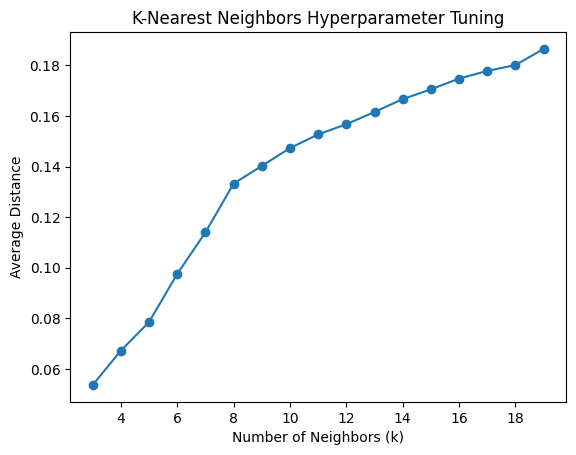

Optimal k found: 3.0


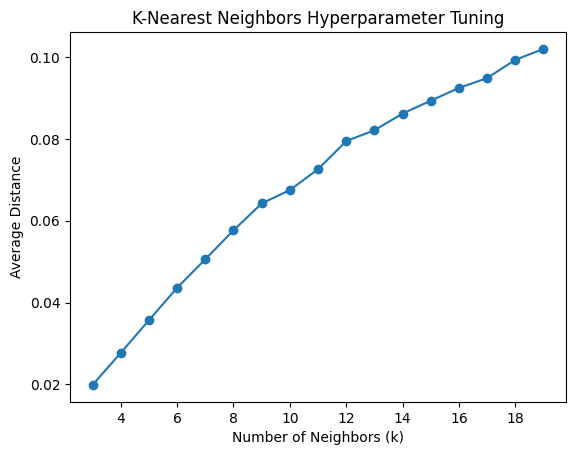

Optimal k found: 3.0


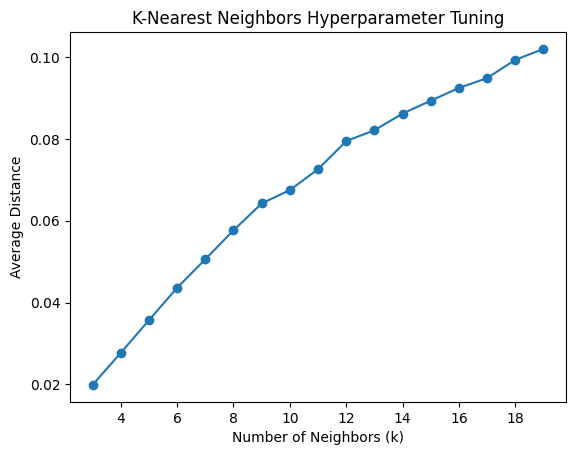

Optimal k found: 3.0


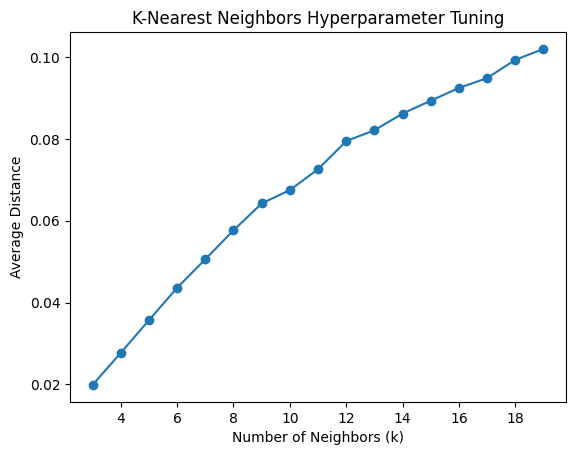

Optimal k found: 3.0


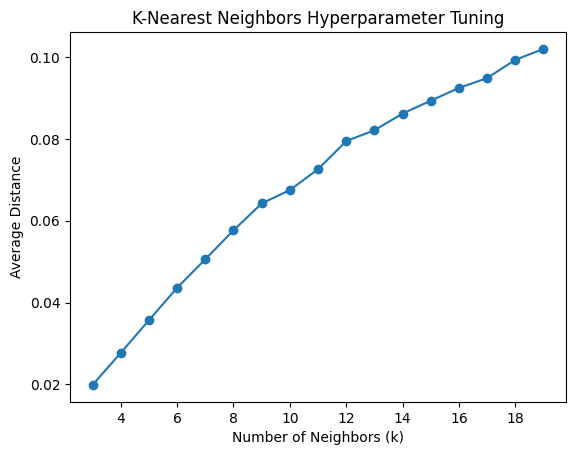

Optimal k found: 3.0


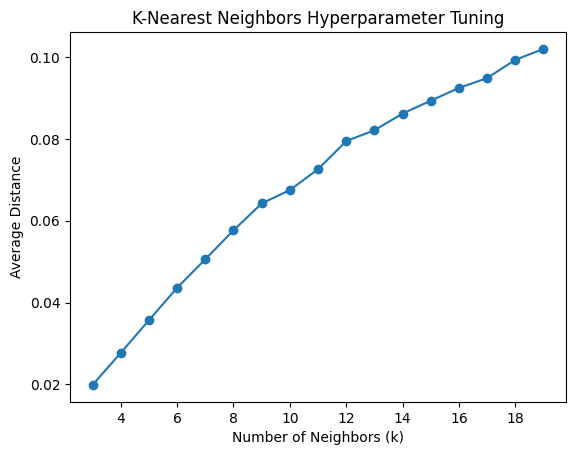

Optimal k found: 3.0
Outlier Companies (Detected as Anomalies in Multiple Datasets):
         Customer ID  Anomaly Occurrences Anomaly Datasets
0   SYNCID0000000760                    2     cheque, wire
2   SYNCID0000001487                    2        emt, wire
52  SYNCID0000000075                    2         eft, abm
53  SYNCID0000000078                    2        card, abm
55  SYNCID0000000095                    2        card, abm
Anomaly detection complete! Results saved as 'final_outliers_with_sources.csv'.


In [103]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# ✅ Hyperparameter tuning function for K
def tune_knn(X_scaled, k_values, percentile=80):
    results = []
    for k in k_values:
        try:
            # Fit KNN with given k
            knn = NearestNeighbors(n_neighbors=min(k, len(X_scaled)))  # Ensure k <= number of samples
            knn.fit(X_scaled)

            # Compute distances to the k-th nearest neighbor
            distances, _ = knn.kneighbors(X_scaled)
            avg_distance = distances[:, -1].mean()  # Average distance of k-th nearest neighbor
            
            # Store results: K and average distance
            results.append((k, avg_distance))

        except Exception as e:
            print(f"Error with k={k}: {e}")
            continue

    # Convert to DataFrame for analysis
    results_df = pd.DataFrame(results, columns=["k", "Average Distance"])

    # Plot K vs Average Distance
    plt.plot(results_df["k"], results_df["Average Distance"], marker='o')
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Average Distance")
    plt.title("K-Nearest Neighbors Hyperparameter Tuning")
    plt.show()

    # Choose optimal k as the one where the average distance is minimal (or elbow point)
    optimal_k = results_df.sort_values("Average Distance").iloc[0]["k"]
    print(f"Optimal k found: {optimal_k}")
    return int(optimal_k)


# ✅ Dictionary to store anomalies per dataframe
anomaly_dict = defaultdict(list)
anomaly_sources = defaultdict(set)  # Track which datasets flagged the anomalies

for name, df in dataframes.items():
    try:
        # Adjust naming convention for EMT, ABM, EFT
        if name.upper() in ["EMT", "ABM", "EFT"]:
            ratio_prefix = name.upper()
        else:
            ratio_prefix = name.capitalize()

        # Ensure the "debit_credit_ratio" column exists
        required_columns = ["customer_id", "credit_debit_ratio"]

        if not all(col in df.columns for col in required_columns):
            print(f"Skipping {name}: Missing required columns.")
            continue

        # Drop missing values and remove infinite values
        df = df.dropna(subset=["credit_debit_ratio"])
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["credit_debit_ratio"])

        # Normalize the data (Use only "debit_credit_ratio")
        X = df[["credit_debit_ratio"]]
        X_scaled = (X - X.mean()) / X.std()  # Standard normalization

        # ✅ Hyperparameter tuning for K
        k_values = range(3, 20)  # Test different values of K (from 3 to 20)
        optimal_k = tune_knn(X_scaled, k_values)

        # ✅ Use KNN with optimal K
        knn = NearestNeighbors(n_neighbors=optimal_k)
        knn.fit(X_scaled)

        # Compute distances to the k-th nearest neighbor
        distances, _ = knn.kneighbors(X_scaled)
        df["KNN Distance"] = distances[:, -1]  # Use k-th neighbor distance

        # Set threshold as the 80th percentile of distances
        threshold = np.percentile(df["KNN Distance"], 80)
        anomalies = df[df["KNN Distance"] > threshold]["customer_id"].tolist()

        # Store anomalies
        anomaly_dict[name] = anomalies

        # Track which datasets flagged each anomaly
        for anomaly in anomalies:
            anomaly_sources[anomaly].add(name)

    except Exception as e:
        print(f"Error processing {name}: {e}")

# ✅ Step 4: Identify Companies Appearing as Anomalies in Multiple DataFrames
anomaly_counts = defaultdict(int)

for name, anomalies in anomaly_dict.items():
    for anomaly in anomalies:
        anomaly_counts[anomaly] += 1

# Convert to DataFrame
anomaly_df = pd.DataFrame(list(anomaly_counts.items()), columns=["Customer ID", "Anomaly Occurrences"])

# Add a column listing the datasets where each company was flagged
anomaly_df["Anomaly Datasets"] = anomaly_df["Customer ID"].apply(lambda x: ", ".join(anomaly_sources[x]))

# Filter companies appearing as anomalies in multiple datasets
outliers = anomaly_df[anomaly_df["Anomaly Occurrences"] > 1]

# ✅ Display the results
print("Outlier Companies (Detected as Anomalies in Multiple Datasets):")
print(outliers.head())  # Display first few rows

# ✅ Save results
outliers.to_csv("final_outliers_with_sources.csv", index=False)
print("Anomaly detection complete! Results saved as 'final_outliers_with_sources.csv'.")


In [104]:
import pandas as pd

# Load the KYC data from kyc.csv
kyc_df = pd.read_csv("csv_files/kyc.csv")  # Make sure kyc.csv is in the correct path

# Load final outliers with sources (ensure the file exists)
final_outliers = pd.read_csv("final_outliers_with_sources.csv")

# Rename "Customer ID" in final_outliers to match kyc_df
final_outliers.rename(columns={"Customer ID": "customer_id"}, inplace=True)

# Now merge
merged_df = final_outliers.merge(kyc_df, on="customer_id", how="left")

# Display merged results
print("Merged Anomalies with KYC Data:")
print(merged_df.head())

# Save merged results
merged_df.to_csv("final_outliers_with_kyc.csv", index=False)
print("Merged results saved as 'final_outliers_with_kyc.csv'")

# Merge anomalies with KYC data
merged_df = final_outliers.merge(kyc_df, on="customer_id", how="left")

# Display merged results
print("Merged Anomalies with KYC Data:")
print(merged_df.head())

# Save merged results
merged_df.to_csv("final_outliers_with_kyc.csv", index=False)
print("Merged results saved as 'final_outliers_with_kyc.csv'")


Merged Anomalies with KYC Data:
        customer_id  Anomaly Occurrences Anomaly Datasets country province  \
0  SYNCID0000000760                    2     cheque, wire      CA       ON   
1  SYNCID0000001487                    2        emt, wire      CA       ON   
2  SYNCID0000000075                    2         eft, abm      CA      NaN   
3  SYNCID0000000078                    2        card, abm      CA       AB   
4  SYNCID0000000095                    2        card, abm      CA       ON   

         city industry_code  employee_count     sales established_date  \
0      OTTAWA          9999             1.0       0.0       2018-04-08   
1  NORTH YORK         other             2.0       0.0       2023-02-26   
2       other          7731             1.0  252807.0       2001-06-21   
3       other          7215             1.0       0.0              NaN   
4    RICHMOND          7511             0.0       0.0       2011-09-11   

  onboard_date  
0   2019-11-08  
1   2023-03-06  
2  

In [105]:
import pandas as pd

# Read the first dataset
df1 = pd.read_csv('final_outliers_with_kyc.csv')

# Read the second dataset without headers
df2 = pd.read_csv('anomolies_withDebitRatio2.csv', header=None, names=['customer_id'])

# Find duplicates by merging on 'customer_id'
common_ids = pd.merge(df1[['customer_id']], df2[['customer_id']], on='customer_id', how='inner')

# Print the count of duplicates
print(f"Number of duplicate customer_ids: {len(common_ids)}")

# Print the duplicate customer_ids
print("Duplicate customer_ids:")
print(common_ids['customer_id'].tolist())


Number of duplicate customer_ids: 5
Duplicate customer_ids:
['SYNCID0000001487', 'SYNCID0000001013', 'SYNCID0000001103', 'SYNCID0000000276', 'SYNCID0000000917']


In [106]:
import pandas as pd

# Load the dataset
df = pd.read_csv("final_outliers_with_kyc.csv")

# Count occurrences of each industry code
industry_counts = df["industry_code"].value_counts().reset_index()
industry_counts.columns = ["industry_code", "count"]

# Calculate percentage
total_count = industry_counts["count"].sum()
industry_counts["percentage"] = (industry_counts["count"] / total_count) * 100

# Sort industries by count in descending order
industry_counts = industry_counts.sort_values(by="count", ascending=False)

# Display the results
print(industry_counts.head())

# Save the results as CSV
industry_counts.to_csv("ranked_industry_counts_with_percentage.csv", index=False)
print("Industry counts with percentages saved as 'ranked_industry_counts_with_percentage.csv'")


  industry_code  count  percentage
0         other     17        13.6
1          7215     11         8.8
2          4013      5         4.0
3          4561      5         4.0
4          8652      4         3.2
Industry counts with percentages saved as 'ranked_industry_counts_with_percentage.csv'


In [108]:
import pandas as pd

# ✅ Load the dataset
df = pd.read_csv("csv_files/adv.csv")

# ✅ Count occurrences of each industry code
industry_counts = df["industry_code"].value_counts().reset_index()
industry_counts.columns = ["industry_code", "count"]

# ✅ Calculate percentage
total_count = industry_counts["count"].sum()
industry_counts["percentage"] = (industry_counts["count"] / total_count) * 100

# ✅ Sort industries by count in descending order
industry_counts = industry_counts.sort_values(by="count", ascending=False)

# ✅ Display the results
print(industry_counts.head())

# ✅ Save the results as CSV
industry_counts.to_csv("ranked_industry_counts_with_percentage.csv", index=False)
print("Industry counts with percentages saved as 'ranked_industry_counts_with_percentage.csv'")


  industry_code  count  percentage
0         other   1935   12.195122
1          7215   1100    6.932627
2          7771    768    4.840234
3          4561    557    3.510430
4          7292    517    3.258335
Industry counts with percentages saved as 'ranked_industry_counts_with_percentage.csv'


In [ ]:
import pandas as pd
from scipy.stats import chisquare

# ✅ Input Data: Replace with your exact counts
df = pd.DataFrame({
    "industry_code": ["4013", "7215", "other", "7771", "7759", "7761"],
    "observed_count": [9, 7, 16, 7, 3, 3],    # MINE
    "expected_count": [6, 7, 16, 18, 9, 23]   # OLIVIA
})

# ✅ Perform Chi-Square Test
chi2_stat, p_value = chisquare(df["observed_count"], f_exp=df["expected_count"])

# ✅ Output Results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

# ✅ Interpretation
if p_value < 0.05:
    print("🚨 Reject the null hypothesis: The industry distributions are significantly different.")
else:
    print("✅ Fail to reject the null hypothesis: No significant difference in industry distributions.")
